In [19]:
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image
import cv2
import models.new_crnn as crnn
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model_path = 'data/netCRNN_25_1388.pth'
img_path = '../../misc/Annotatedblobs/'
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
img_list = os.listdir(img_path)
model = crnn.CRNN(32, 1,len(alphabet)+1, 256)
own = model.state_dict()
#print own.keys()
if torch.cuda.is_available():
    model = model.cuda()
print('loading pretrained model from %s' % model_path)


w = torch.load(model_path)

#print w.keys()[0]
w1={}

for k,v in w.items():
	w1[str.split(k,'module.')[1]]=v


model.load_state_dict(w1)

loading pretrained model from data/netCRNN_25_1388.pth


In [3]:
model

CRNN (
  (cnn): Sequential (
    (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu0): ReLU (inplace)
    (pooling0): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU (inplace)
    (pooling1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (relu2): ReLU (inplace)
    (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU (inplace)
    (pooling2): MaxPool2d (size=(2, 2), stride=(2, 1), dilation=(1, 1))
    (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (relu4): ReLU (inplace)
    (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), pad

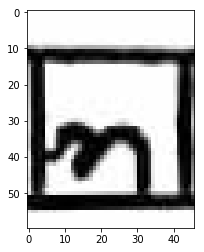

ORIGINAL: n M
enter: n
0.0


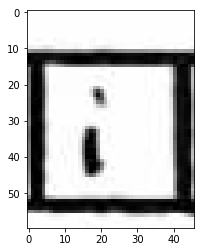

ORIGINAL: i I
enter: i
0.5


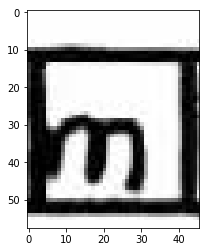

ORIGINAL: m M
enter: m
0.666666666667


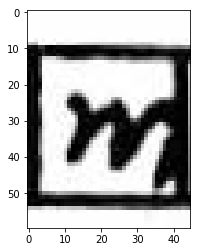

ORIGINAL: m n
enter: m
0.5


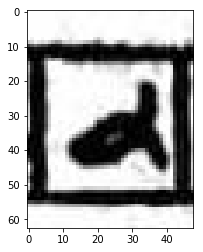

ORIGINAL: d d
enter: d
0.6


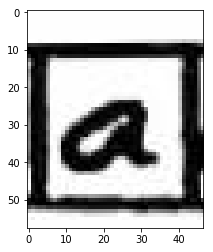

ORIGINAL: a a
enter: a
0.666666666667


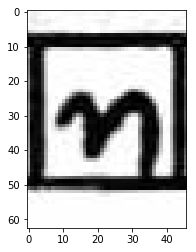

ORIGINAL: n n
enter: n
0.714285714286


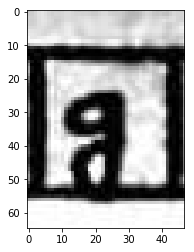

ORIGINAL: g g
enter: g
0.75


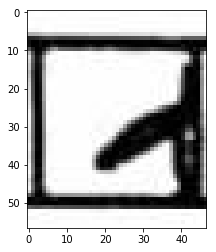

ORIGINAL: d J
enter: d
0.666666666667


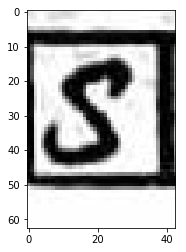

ORIGINAL: S S
enter: s
0.7


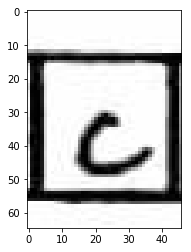

ORIGINAL: c C
enter: c
0.727272727273


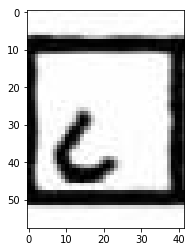

ORIGINAL: c L
enter: c
0.666666666667


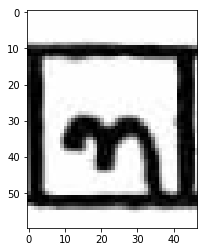

ORIGINAL: n M
enter: n
0.615384615385


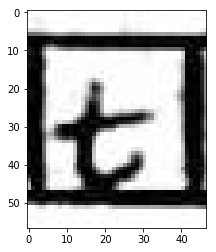

ORIGINAL: t t
enter: t
0.642857142857


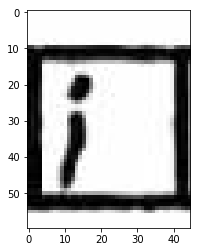

ORIGINAL: i F
enter: i
0.6


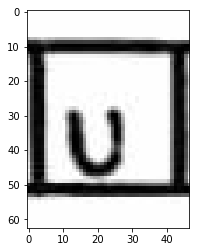

ORIGINAL: u V
enter: u
0.5625


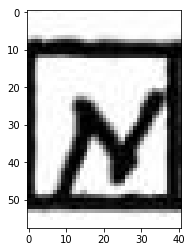

ORIGINAL: N N
enter: n
0.588235294118


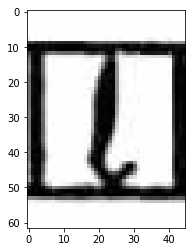

ORIGINAL: l L
enter: l
0.611111111111


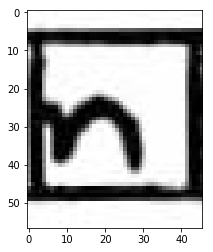

ORIGINAL: n n
enter: n
0.631578947368


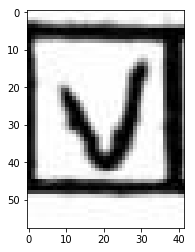

ORIGINAL: v V
enter: v
0.65


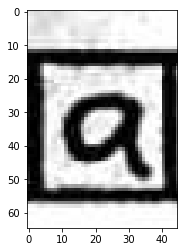

ORIGINAL: a a
enter: a
0.666666666667


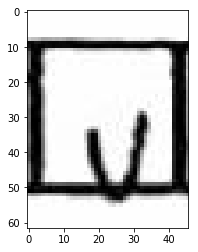

ORIGINAL: v U
enter: v
0.636363636364


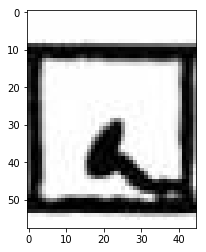

ORIGINAL: a I
enter: a
0.608695652174


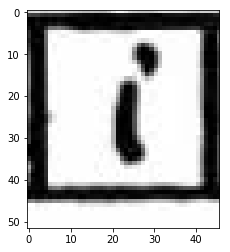

ORIGINAL: i I
enter: i
0.625


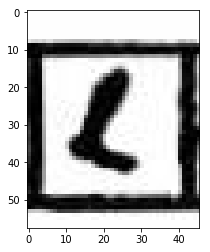

ORIGINAL: l L
enter: l
0.64


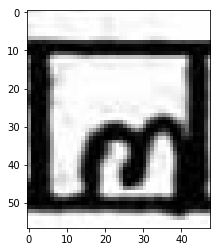

ORIGINAL: m V
enter: m
0.615384615385


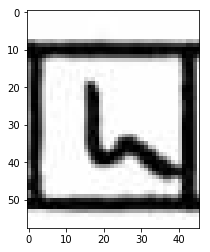

ORIGINAL: h K
enter: h
0.592592592593


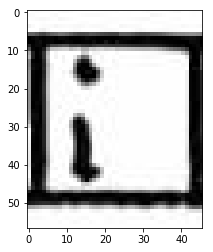

ORIGINAL: a I
enter: i
0.607142857143


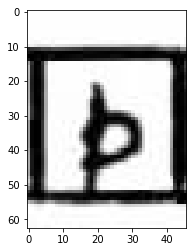

ORIGINAL: p B
enter: p
0.586206896552


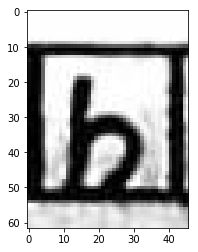

ORIGINAL: b h
enter: b
0.566666666667


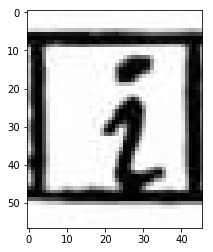

ORIGINAL: i Z
enter: i
0.548387096774


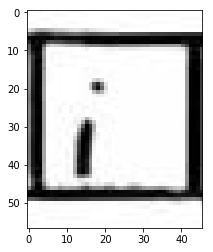

ORIGINAL: i I
enter: i
0.5625


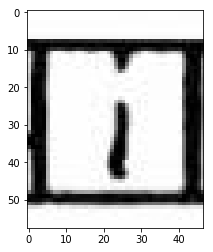

ORIGINAL: i I
enter: i
0.575757575758


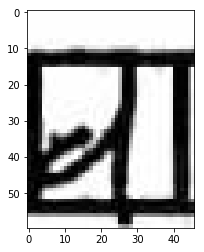

ORIGINAL: d d
enter: d
0.588235294118


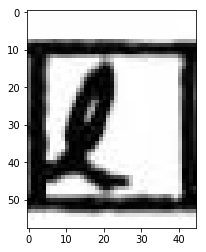

ORIGINAL: l R
enter: l
0.571428571429


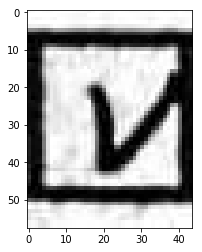

ORIGINAL: v V
enter: v
0.583333333333


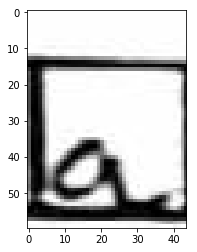

ORIGINAL: a a
enter: a
0.594594594595


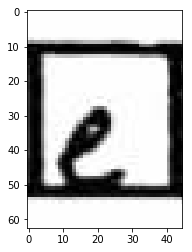

ORIGINAL: e R
enter: e
0.578947368421


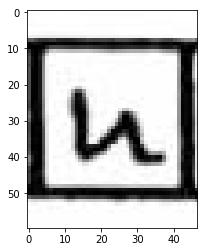

ORIGINAL: u U
enter: u
0.589743589744


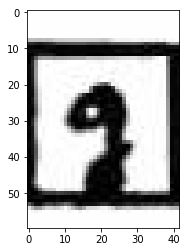

ORIGINAL: g g
enter: g
0.6


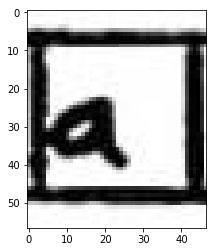

ORIGINAL: a A
enter: a
0.609756097561


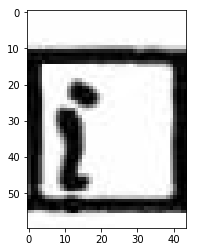

ORIGINAL: i I
enter: i
0.619047619048


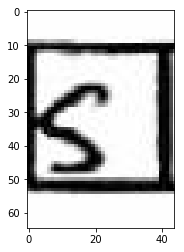

ORIGINAL: S G
enter: s
0.604651162791


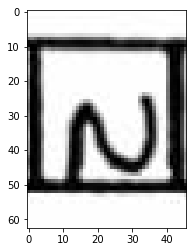

ORIGINAL: N N
enter: n
0.613636363636


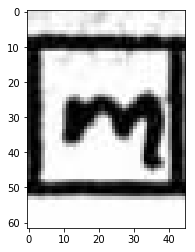

ORIGINAL: m n
enter: m
0.6


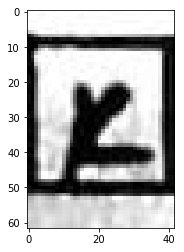

ORIGINAL: k R
enter: k
0.586956521739


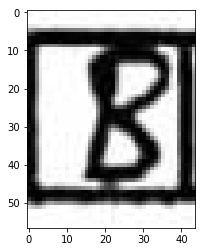

ORIGINAL: B B
enter: b
0.595744680851


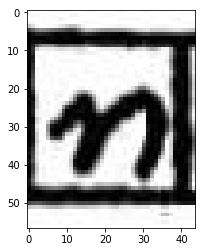

ORIGINAL: n n
enter: n
0.604166666667


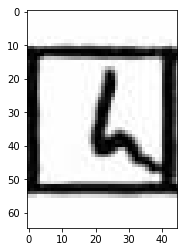

ORIGINAL: h h
enter: h
0.612244897959


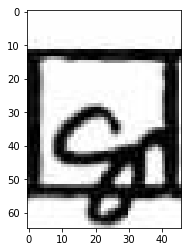

ORIGINAL: g G
enter: g
0.62


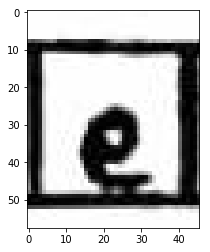

ORIGINAL: e e
enter: e
0.627450980392


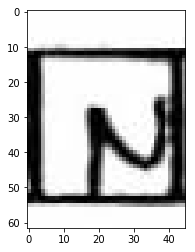

ORIGINAL: i N
enter: n
0.634615384615


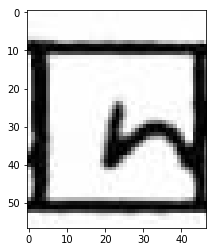

ORIGINAL: e r
enter: n
0.622641509434


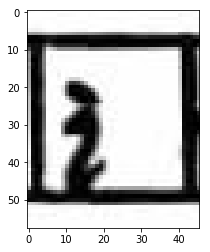

ORIGINAL: i B
enter: i
0.611111111111


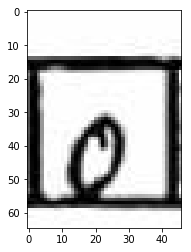

ORIGINAL: o O
enter: o
0.618181818182


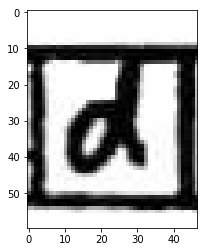

ORIGINAL: d d
enter: d
0.625


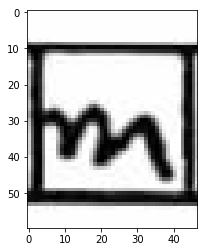

ORIGINAL: m M
enter: m
0.631578947368


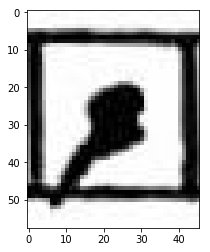

ORIGINAL: s q
enter: q
0.637931034483


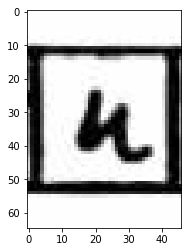

ORIGINAL: u U
enter: u
0.64406779661


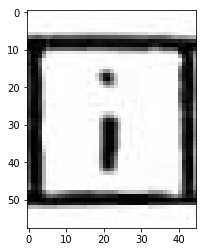

ORIGINAL: i I
enter: i
0.65


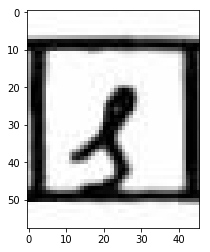

ORIGINAL: s g
enter: s
0.639344262295


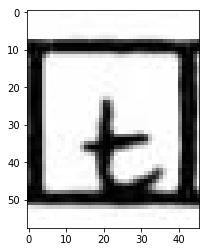

ORIGINAL: t t
enter: t
0.645161290323


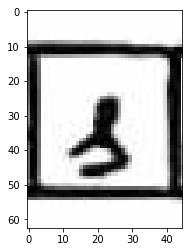

ORIGINAL: s J
enter: s
0.634920634921


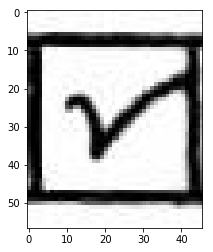

ORIGINAL: r V
enter: v
0.640625


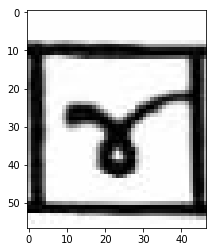

ORIGINAL: r g
enter: r
0.630769230769


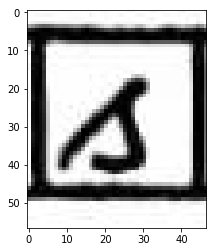

ORIGINAL: s D
enter: s
0.621212121212


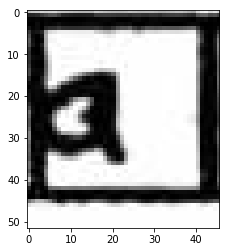

ORIGINAL: a A
enter: a
0.626865671642


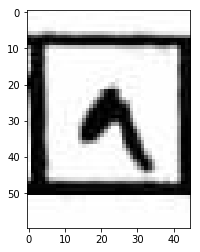

ORIGINAL: a n
enter: a
0.617647058824


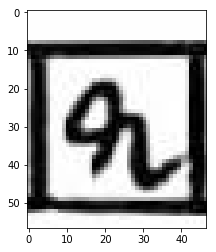

ORIGINAL: r q
enter: r
0.608695652174


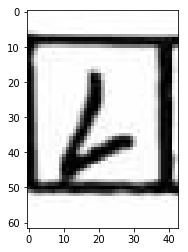

ORIGINAL: L L
enter: l
0.614285714286


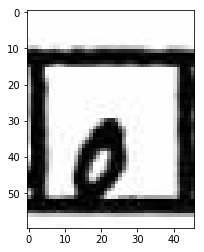

ORIGINAL: o O
enter: o
0.619718309859


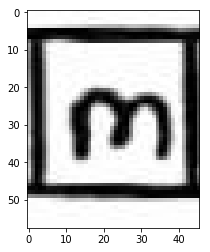

ORIGINAL: m M
enter: m
0.625


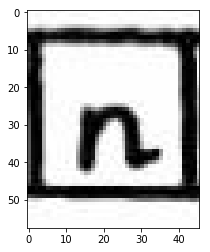

ORIGINAL: n n
enter: n
0.630136986301


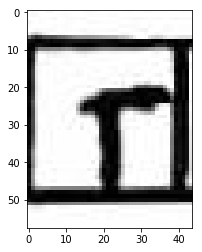

ORIGINAL: T T
enter: t
0.635135135135


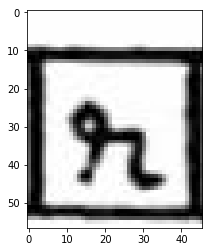

ORIGINAL: r R
enter: r
0.64


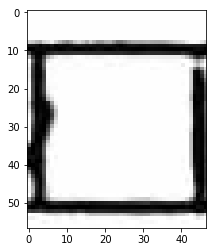

ORIGINAL: w f
enter: f
0.644736842105


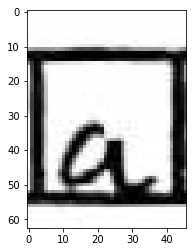

ORIGINAL: a a
enter: a
0.649350649351


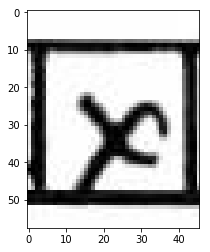

ORIGINAL: x X
enter: x
0.653846153846


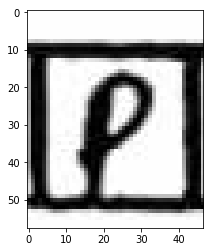

ORIGINAL: P P
enter: p
0.658227848101


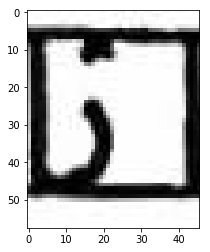

ORIGINAL: j d
enter: j
0.65


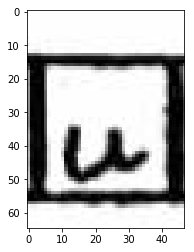

ORIGINAL: u U
enter: u
0.654320987654


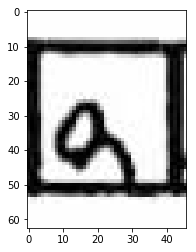

ORIGINAL: r g
enter: r
0.646341463415


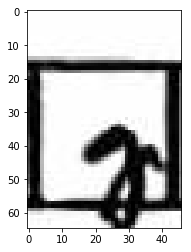

ORIGINAL: g g
enter: g
0.650602409639


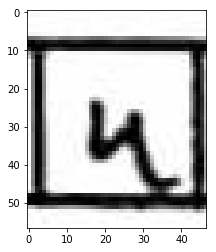

ORIGINAL: u U
enter: u
0.654761904762


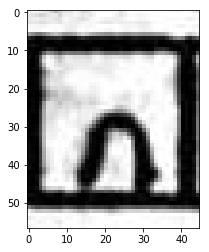

ORIGINAL: n n
enter: n
0.658823529412


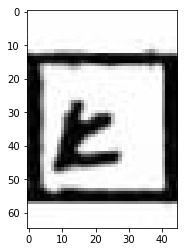

ORIGINAL: k K
enter: k
0.662790697674


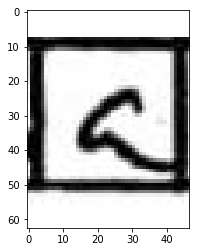

ORIGINAL: a G
enter: a
0.655172413793


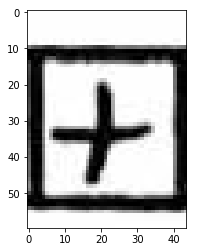

ORIGINAL: t t
enter: t
0.659090909091


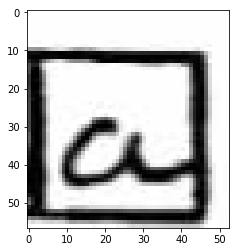

ORIGINAL: a d
enter: a
0.651685393258


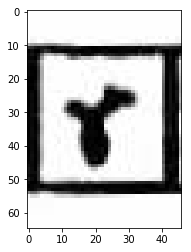

ORIGINAL: r r
enter: r
0.655555555556


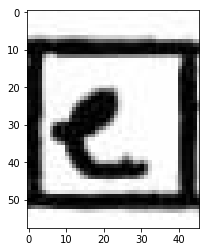

ORIGINAL: e e
enter: e
0.659340659341


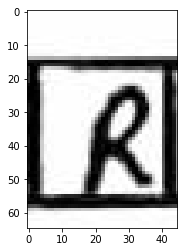

ORIGINAL: R R
enter: r
0.663043478261


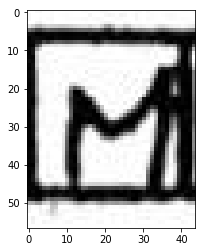

ORIGINAL: M r
enter: m
0.655913978495


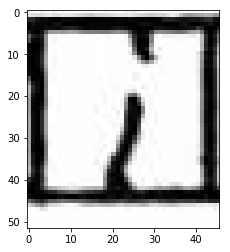

ORIGINAL: i I
enter: i
0.659574468085


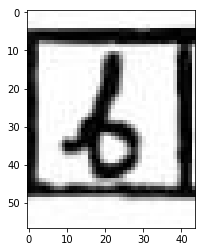

ORIGINAL: b b
enter: b
0.663157894737


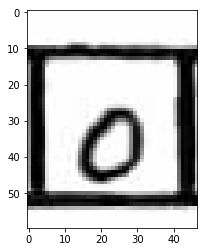

ORIGINAL: o O
enter: o
0.666666666667


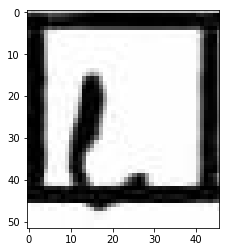

ORIGINAL: l L
enter: l
0.670103092784


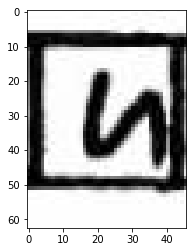

ORIGINAL: h U
enter: u
0.673469387755


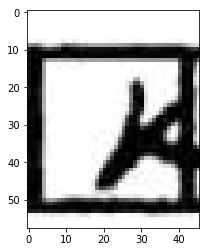

ORIGINAL: k K
enter: k
0.676767676768


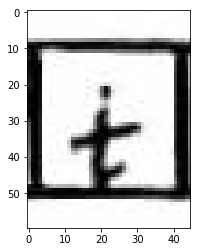

ORIGINAL: t t
enter: t
0.68


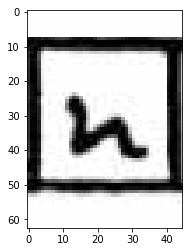

ORIGINAL: r K
enter: n
0.673267326733


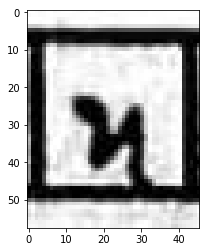

ORIGINAL: n U
enter: u
0.676470588235


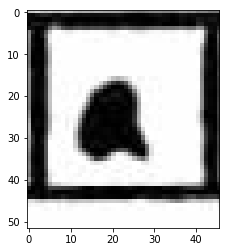

ORIGINAL: a a
enter: a
0.679611650485


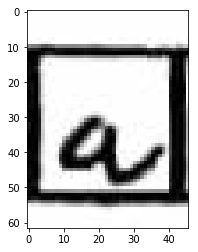

ORIGINAL: a Q
enter: a
0.673076923077


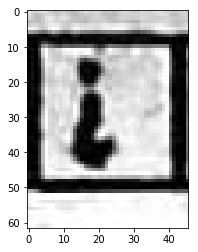

ORIGINAL: i E
enter: i
0.666666666667


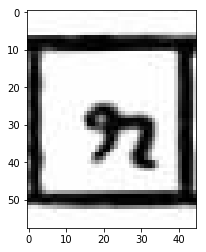

ORIGINAL: r n
enter: r
0.660377358491


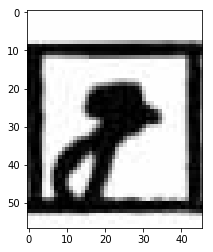

ORIGINAL: g g
enter: g
0.663551401869


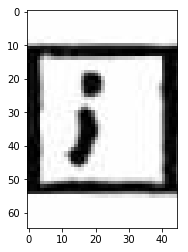

ORIGINAL: i J
enter: i
0.657407407407


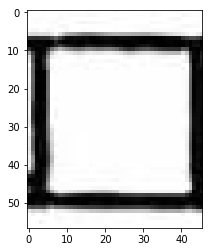

ORIGINAL: n I
enter: I
0.660550458716


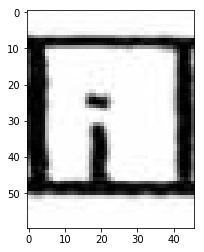

ORIGINAL: i I
enter: i
0.663636363636


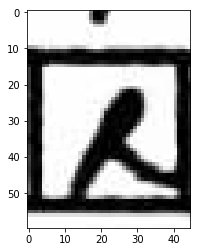

ORIGINAL: R R
enter: r
0.666666666667


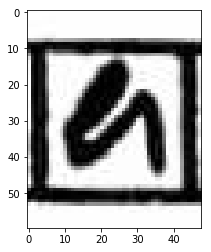

ORIGINAL: h h
enter: h
0.669642857143


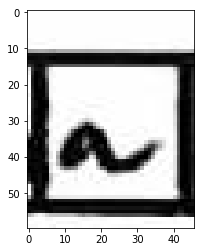

ORIGINAL: a h
enter: a
0.663716814159


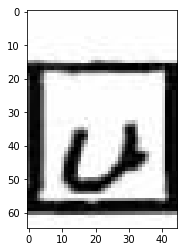

ORIGINAL: u U
enter: u
0.666666666667


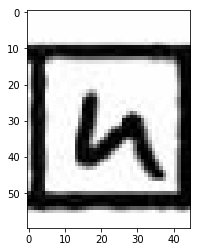

ORIGINAL: u h
enter: h
0.669565217391


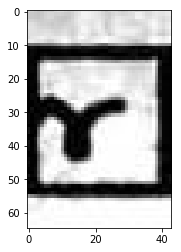

ORIGINAL: r r
enter: r
0.672413793103


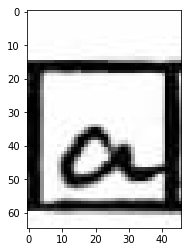

ORIGINAL: a a
enter: a
0.675213675214


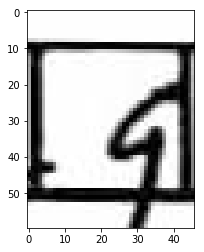

ORIGINAL: g M
enter: g
0.669491525424


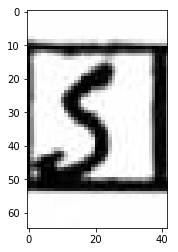

ORIGINAL: S S
enter: s
0.672268907563


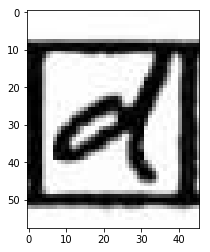

ORIGINAL: d H
enter: d
0.666666666667


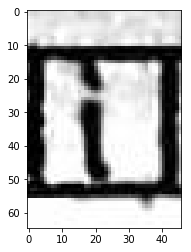

ORIGINAL: i J
enter: i
0.661157024793


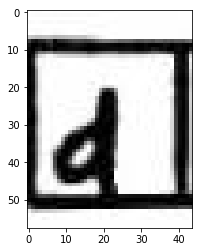

ORIGINAL: d d
enter: d
0.66393442623


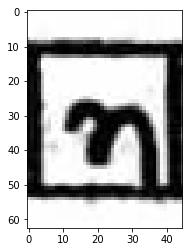

ORIGINAL: n n
enter: n
0.666666666667


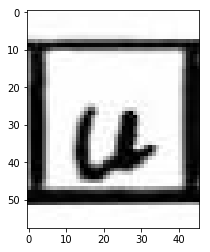

ORIGINAL: u U
enter: u
0.66935483871


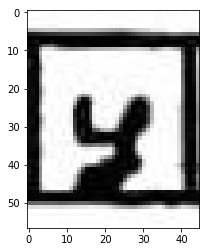

ORIGINAL: y Y
enter: y
0.672


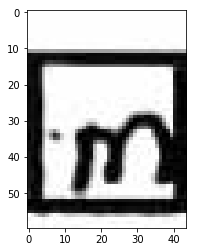

ORIGINAL: m M
enter: m
0.674603174603


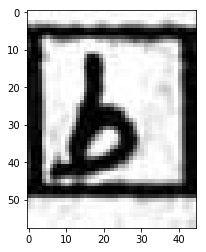

ORIGINAL: b b
enter: b
0.677165354331


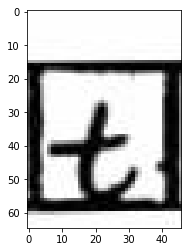

ORIGINAL: t K
enter: t
0.671875


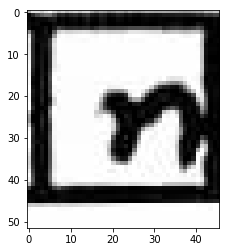

ORIGINAL: n n
enter: n
0.674418604651


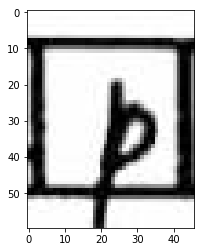

ORIGINAL: p P
enter: p
0.676923076923


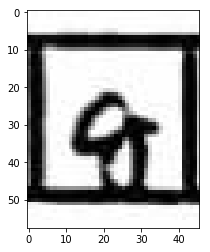

ORIGINAL: g g
enter: g
0.679389312977


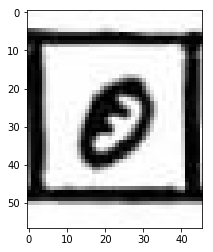

ORIGINAL: o O
enter: o
0.681818181818


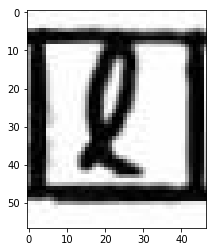

ORIGINAL: l K
enter: l
0.676691729323


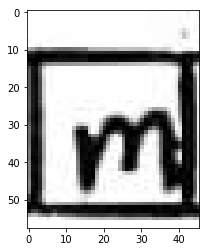

ORIGINAL: m M
enter: m
0.679104477612


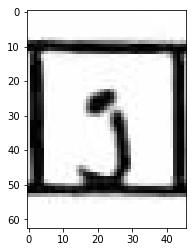

ORIGINAL: j J
enter: j
0.681481481481


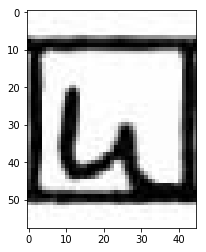

ORIGINAL: u U
enter: u
0.683823529412


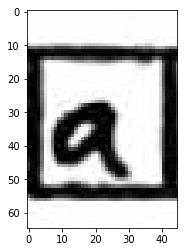

ORIGINAL: a a
enter: a
0.686131386861


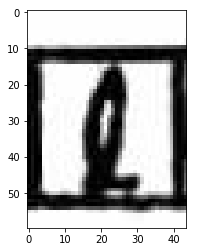

ORIGINAL: l q
enter: l
0.68115942029


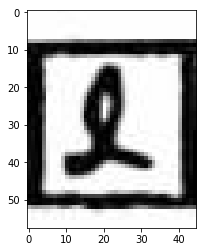

ORIGINAL: l q
enter: l
0.676258992806


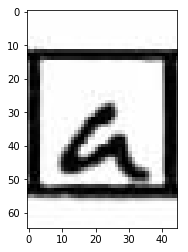

ORIGINAL: a h
enter: a
0.671428571429


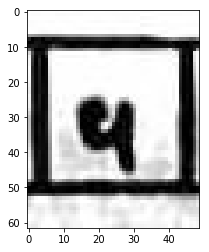

ORIGINAL: u M
enter: u
0.666666666667


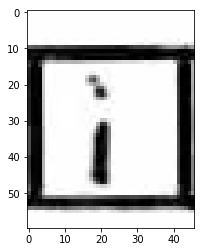

ORIGINAL: i I
enter: i
0.669014084507


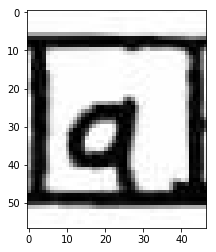

ORIGINAL: a g
enter: a
0.664335664336


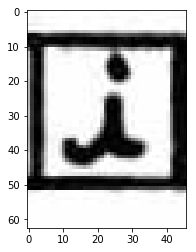

ORIGINAL: i L
enter: i
0.659722222222


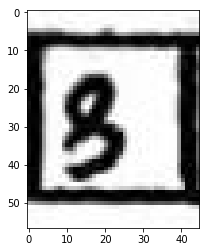

ORIGINAL: s g
enter: s
0.655172413793


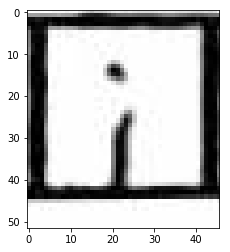

ORIGINAL: i J
enter: i
0.650684931507


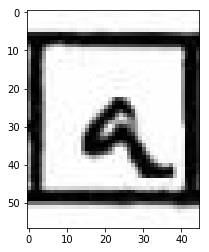

ORIGINAL: t a
enter: a
0.65306122449


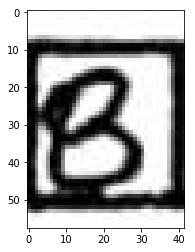

ORIGINAL: B B
enter: b
0.655405405405


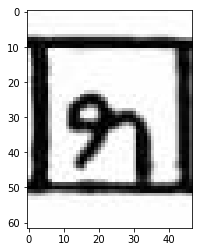

ORIGINAL: r M
enter: r
0.651006711409


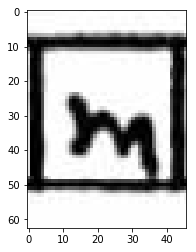

ORIGINAL: m M
enter: m
0.653333333333


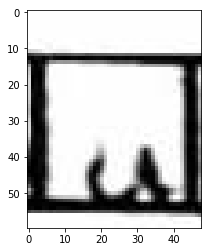

ORIGINAL: u I
enter: u
0.649006622517


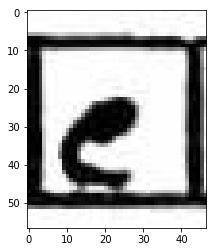

ORIGINAL: e e
enter: e
0.651315789474


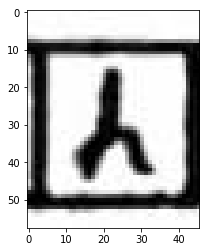

ORIGINAL: h h
enter: h
0.653594771242


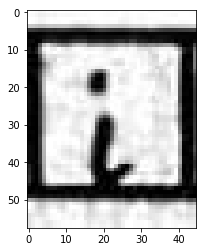

ORIGINAL: i t
enter: i
0.649350649351


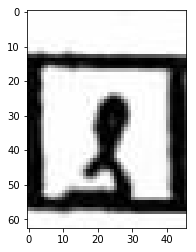

ORIGINAL: s Z
enter: s
0.645161290323


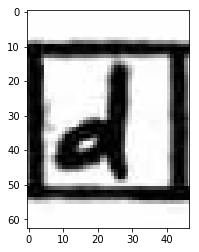

ORIGINAL: d d
enter: d
0.647435897436


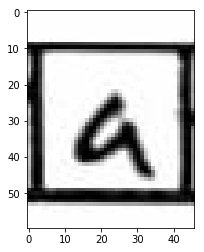

ORIGINAL: a a
enter: a
0.649681528662


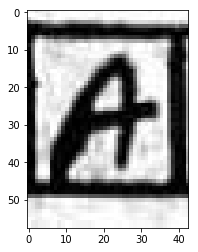

ORIGINAL: A A
enter: a
0.651898734177


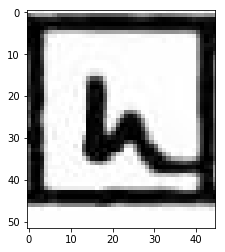

ORIGINAL: n h
enter: h
0.654088050314


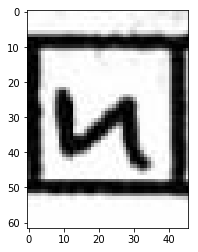

ORIGINAL: u n
enter: u
0.65


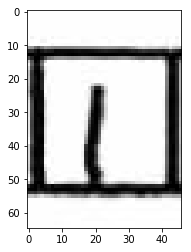

ORIGINAL: l L
enter: l
0.652173913043


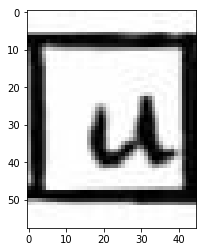

ORIGINAL: u U
enter: u
0.654320987654


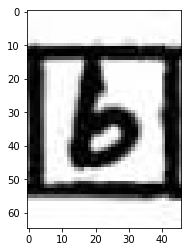

ORIGINAL: b b
enter: b
0.656441717791


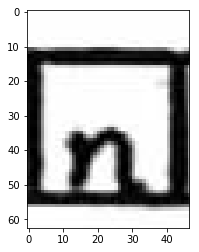

ORIGINAL: n n
enter: n
0.658536585366


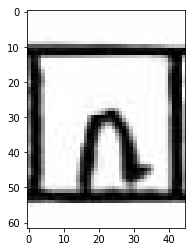

ORIGINAL: n n
enter: n
0.660606060606


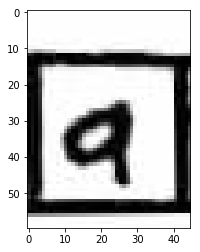

ORIGINAL: a a
enter: a
0.66265060241


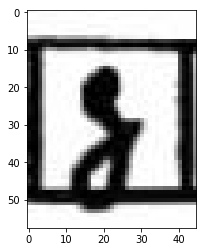

ORIGINAL: g g
enter: g
0.664670658683


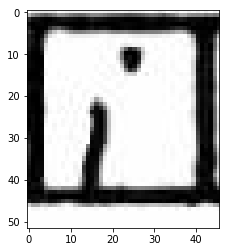

ORIGINAL: i L
enter: i
0.660714285714


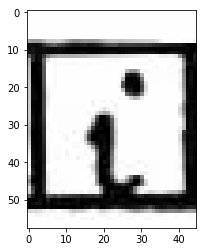

ORIGINAL: i I
enter: i
0.662721893491


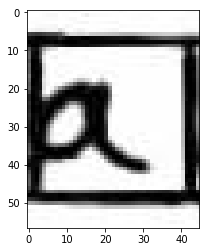

ORIGINAL: a q
enter: a
0.658823529412


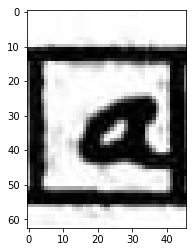

ORIGINAL: a a
enter: a
0.66081871345


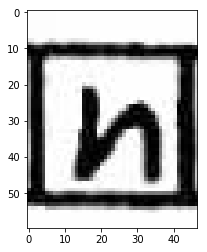

ORIGINAL: h h
enter: h
0.662790697674


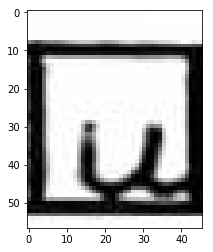

ORIGINAL: u U
enter: u
0.664739884393


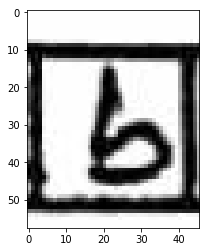

ORIGINAL: b b
enter: b
0.666666666667


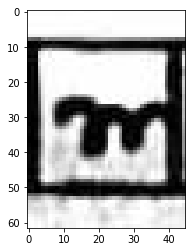

ORIGINAL: m M
enter: m
0.668571428571


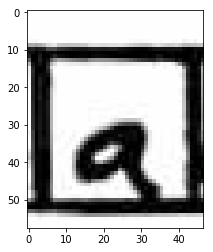

ORIGINAL: a a
enter: a
0.670454545455


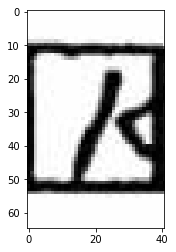

ORIGINAL: K K
enter: k
0.672316384181


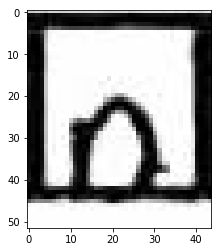

ORIGINAL: n n
enter: n
0.674157303371


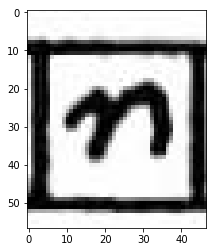

ORIGINAL: n n
enter: n
0.675977653631


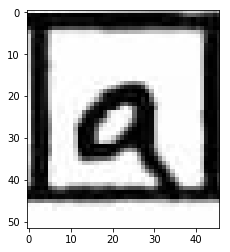

ORIGINAL: a a
enter: a
0.677777777778


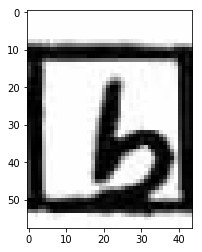

ORIGINAL: b b
enter: b
0.67955801105


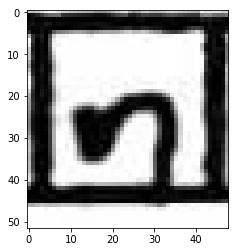

ORIGINAL: n n
enter: n
0.681318681319


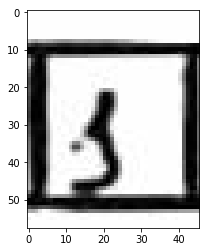

ORIGINAL: s J
enter: s
0.677595628415


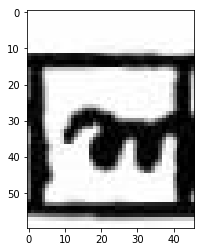

ORIGINAL: m M
enter: m
0.679347826087


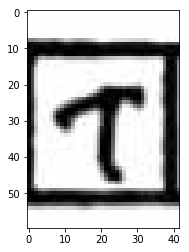

ORIGINAL: T T
enter: t
0.681081081081


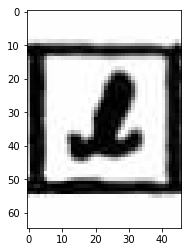

ORIGINAL: l I
enter: l
0.677419354839


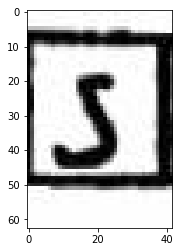

ORIGINAL: S S
enter: s
0.679144385027


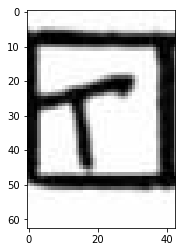

ORIGINAL: T T
enter: t
0.68085106383


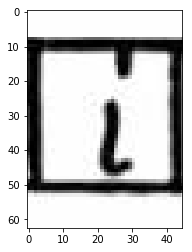

ORIGINAL: i I
enter: i
0.68253968254


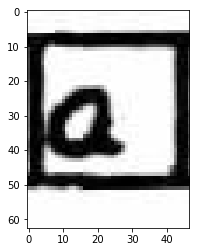

ORIGINAL: a h
enter: a
0.678947368421


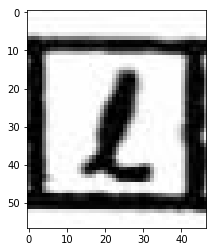

ORIGINAL: l L
enter: l
0.680628272251


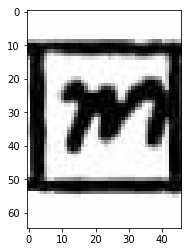

ORIGINAL: m M
enter: m
0.682291666667


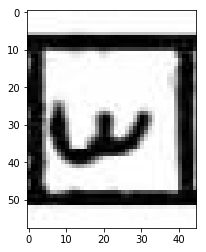

ORIGINAL: u W
enter: w
0.683937823834


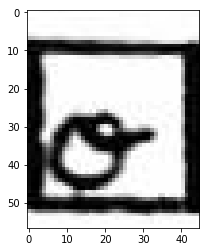

ORIGINAL: o G
enter: o
0.680412371134


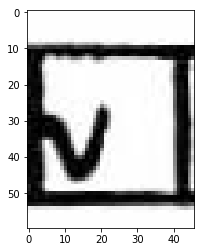

ORIGINAL: v V
enter: v
0.682051282051


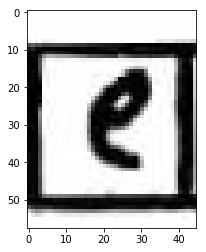

ORIGINAL: e e
enter: e
0.683673469388


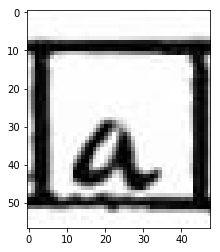

ORIGINAL: a a
enter: a
0.685279187817


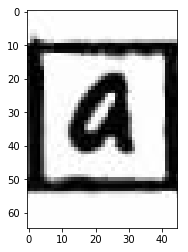

ORIGINAL: a a
enter: a
0.686868686869


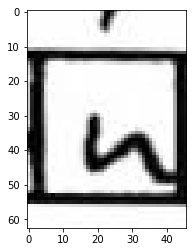

ORIGINAL: n h
enter: n
0.683417085427


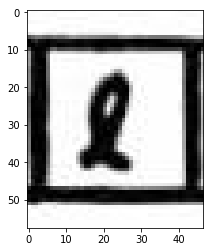

ORIGINAL: l q
enter: l
0.68


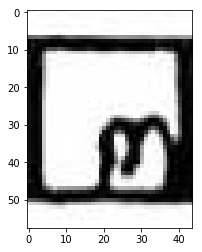

ORIGINAL: m M
enter: m
0.681592039801


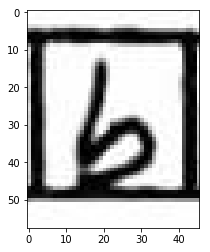

ORIGINAL: b b
enter: b
0.683168316832


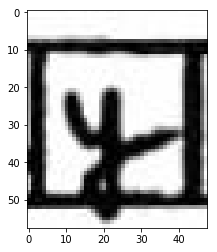

ORIGINAL: y H
enter: y
0.679802955665


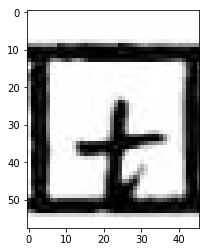

ORIGINAL: t f
enter: t
0.676470588235


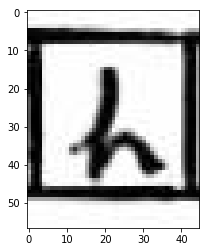

ORIGINAL: h h
enter: h
0.678048780488


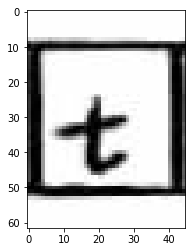

ORIGINAL: t t
enter: t
0.679611650485


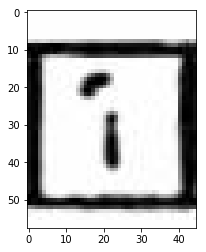

ORIGINAL: i J
enter: i
0.676328502415


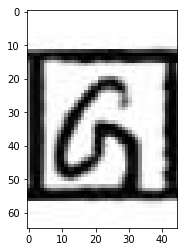

ORIGINAL: G G
enter: g
0.677884615385


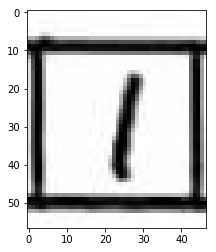

ORIGINAL: l I
enter: l
0.674641148325


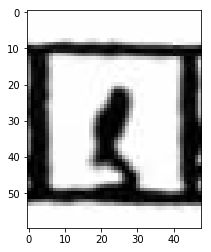

ORIGINAL: s h
enter: s
0.671428571429


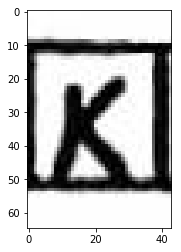

ORIGINAL: K K
enter: k
0.672985781991


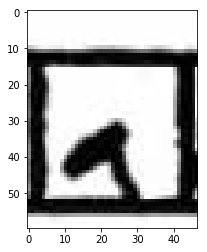

ORIGINAL: a a
enter: a
0.674528301887


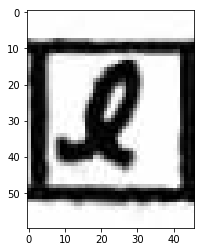

ORIGINAL: l Q
enter: l
0.671361502347


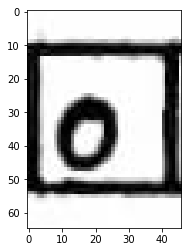

ORIGINAL: o O
enter: o
0.672897196262


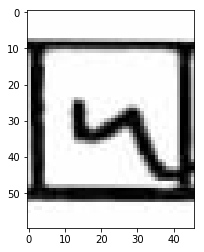

ORIGINAL: n Y
enter: y
0.674418604651


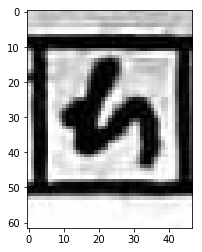

ORIGINAL: h G
enter: h
0.671296296296


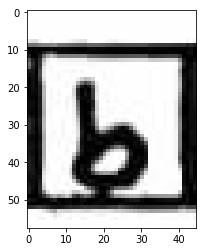

ORIGINAL: b b
enter: b
0.672811059908


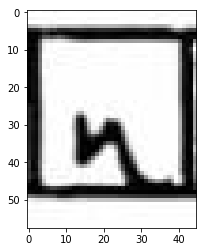

ORIGINAL: n n
enter: n
0.674311926606


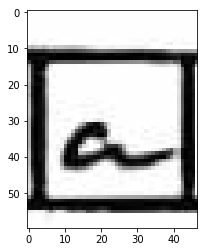

ORIGINAL: a G
enter: a
0.671232876712


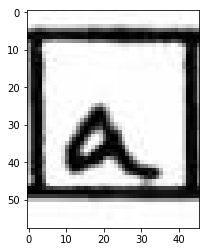

ORIGINAL: a a
enter: a
0.672727272727


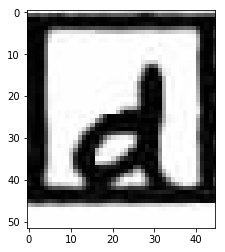

ORIGINAL: d d
enter: d
0.674208144796


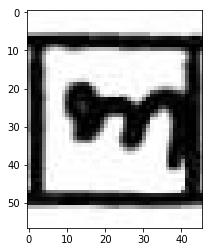

ORIGINAL: m M
enter: m
0.675675675676


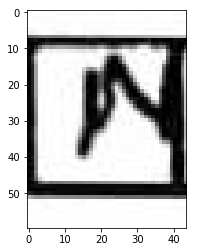

ORIGINAL: N n
enter: n
0.677130044843


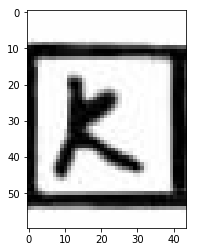

ORIGINAL: K K
enter: k
0.678571428571


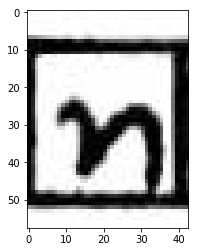

ORIGINAL: n n
enter: n
0.68


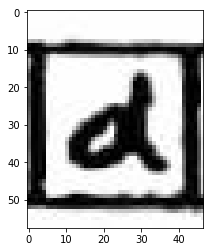

ORIGINAL: d d
enter: d
0.681415929204


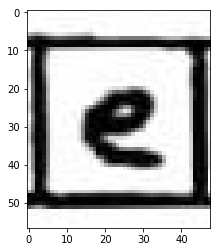

ORIGINAL: e e
enter: e
0.68281938326


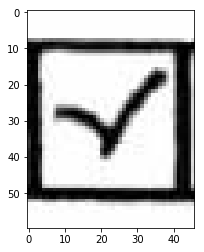

ORIGINAL: r V
enter: r
0.679824561404


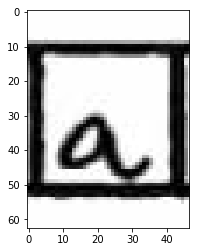

ORIGINAL: a Q
enter: a
0.676855895197


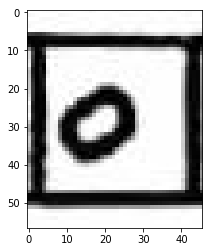

ORIGINAL: o b
enter: o
0.673913043478


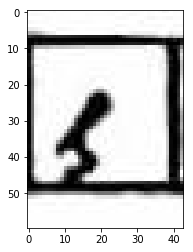

ORIGINAL: s f
enter: s
0.670995670996


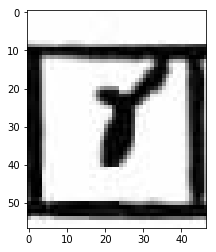

ORIGINAL: r Y
enter: r
0.668103448276


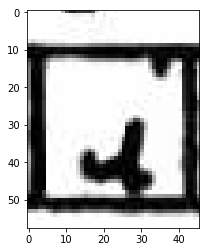

ORIGINAL: i I
enter: i
0.669527896996


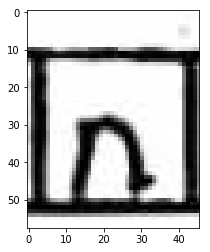

ORIGINAL: n n
enter: n
0.67094017094


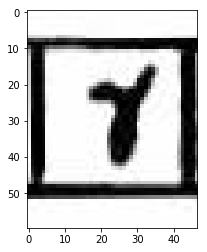

ORIGINAL: r Y
enter: r
0.668085106383


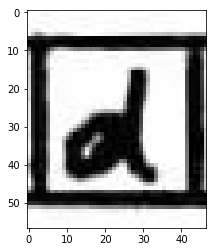

ORIGINAL: d d
enter: d
0.669491525424


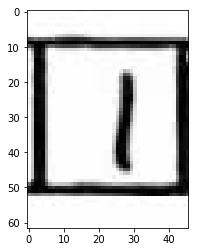

ORIGINAL: l L
enter: i
0.666666666667


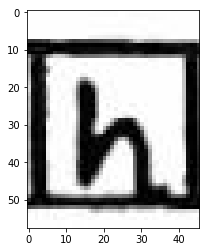

ORIGINAL: h h
enter: h
0.668067226891


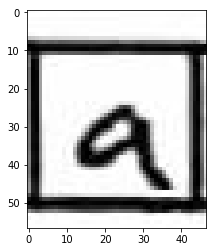

ORIGINAL: a a
enter: a
0.669456066946


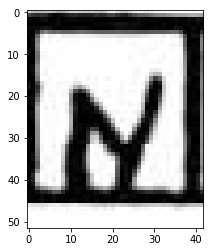

ORIGINAL: N N
enter: n
0.670833333333


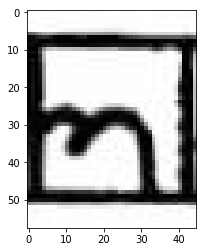

ORIGINAL: n n
enter: n
0.672199170124


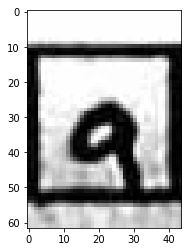

ORIGINAL: a a
enter: a
0.673553719008


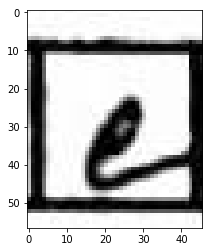

ORIGINAL: i e
enter: e
0.674897119342


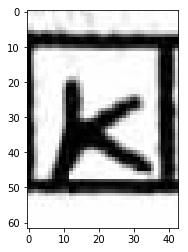

ORIGINAL: K K
enter: k
0.676229508197


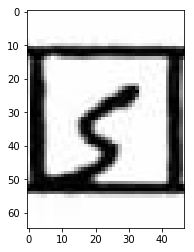

ORIGINAL: s G
enter: s
0.673469387755


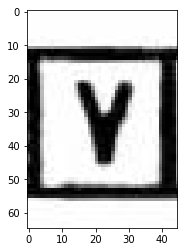

ORIGINAL: v V
enter: v
0.674796747967


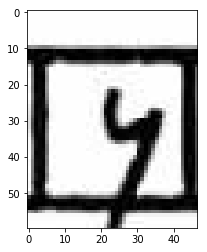

ORIGINAL: y Y
enter: y
0.676113360324


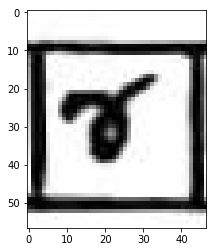

ORIGINAL: r H
enter: r
0.673387096774


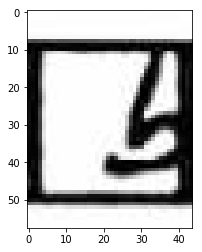

ORIGINAL: b b
enter: b
0.674698795181


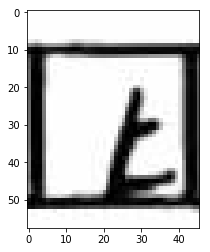

ORIGINAL: k E
enter: t
0.672


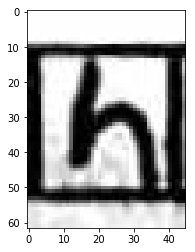

ORIGINAL: h h
enter: h
0.673306772908


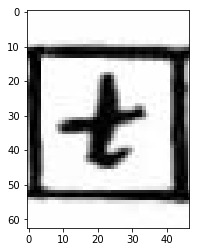

ORIGINAL: t K
enter: t
0.670634920635


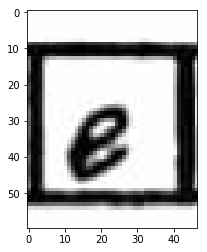

ORIGINAL: e e
enter: e
0.671936758893


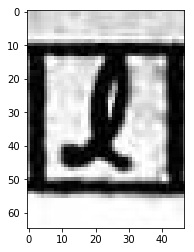

ORIGINAL: l d
enter: l
0.669291338583


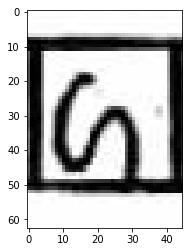

ORIGINAL: G h
enter: g
0.666666666667


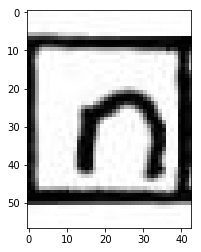

ORIGINAL: n n
enter: n
0.66796875


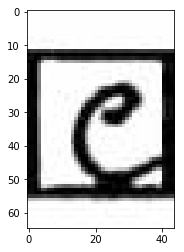

ORIGINAL: e e
enter: e
0.669260700389


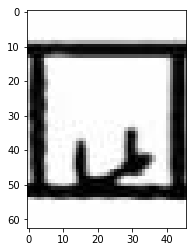

ORIGINAL: u W
enter: u
0.666666666667


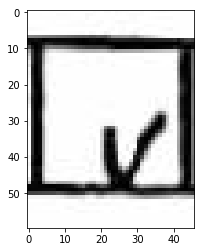

ORIGINAL: v V
enter: v
0.667953667954


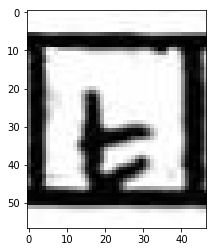

ORIGINAL: t E
enter: t
0.665384615385


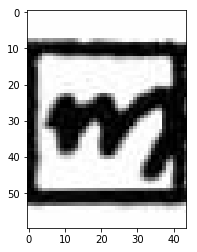

ORIGINAL: m M
enter: m
0.666666666667


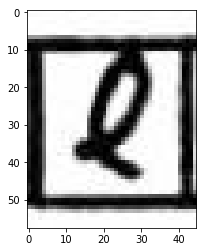

ORIGINAL: l e
enter: l
0.664122137405


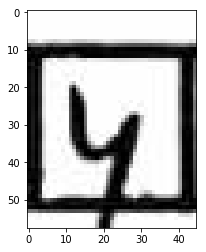

ORIGINAL: Y Y
enter: y
0.665399239544


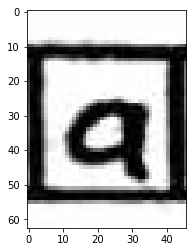

ORIGINAL: a a
enter: a
0.666666666667


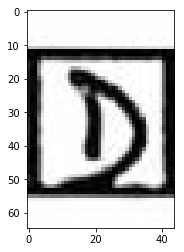

ORIGINAL: D D
enter: d
0.667924528302


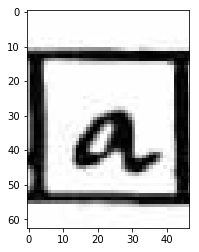

ORIGINAL: a a
enter: a
0.669172932331


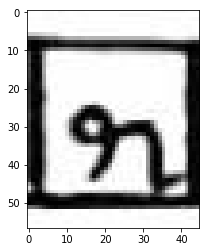

ORIGINAL: r h
enter: r
0.666666666667


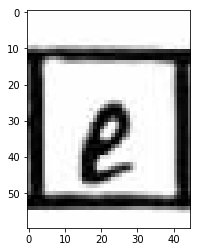

ORIGINAL: e e
enter: e
0.667910447761


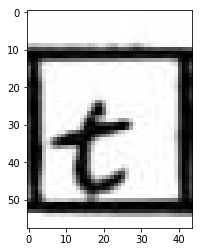

ORIGINAL: t t
enter: t
0.669144981413


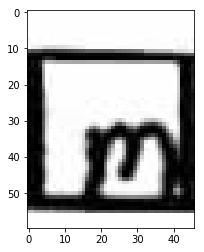

ORIGINAL: m M
enter: m
0.67037037037


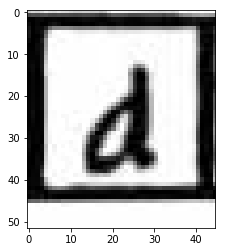

ORIGINAL: d d
enter: d
0.671586715867


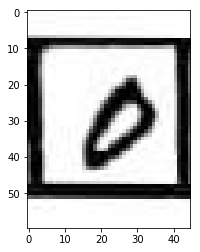

ORIGINAL: o O
enter: o
0.672794117647


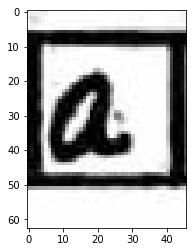

ORIGINAL: a a
enter: a
0.673992673993


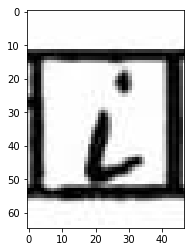

ORIGINAL: i Z
enter: i
0.671532846715


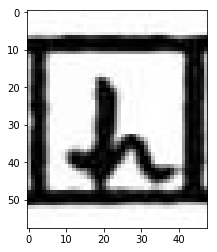

ORIGINAL: h h
enter: h
0.672727272727


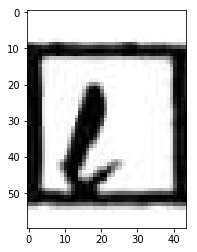

ORIGINAL: l C
enter: l
0.670289855072


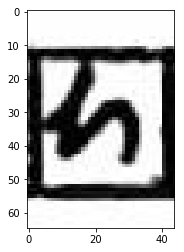

ORIGINAL: h h
enter: h
0.671480144404


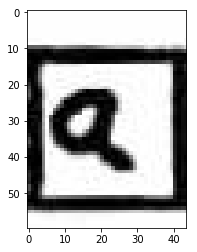

ORIGINAL: a a
enter: a
0.672661870504


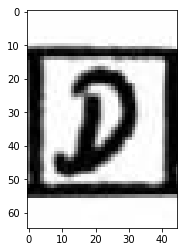

ORIGINAL: D D
enter: d
0.673835125448


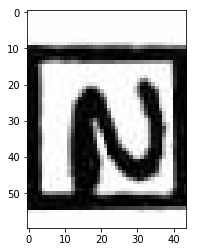

ORIGINAL: N N
enter: n
0.675


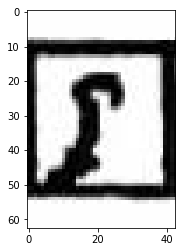

ORIGINAL: I f
enter: f
0.67615658363


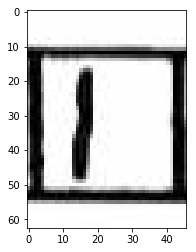

ORIGINAL: l N
enter: l
0.673758865248


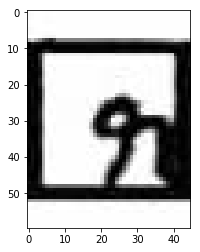

ORIGINAL: r q
enter: r
0.671378091873


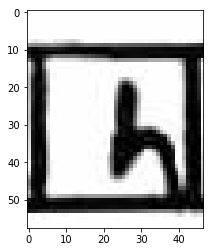

ORIGINAL: h h
enter: h
0.672535211268


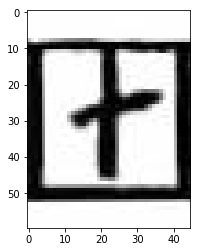

ORIGINAL: t t
enter: t
0.673684210526


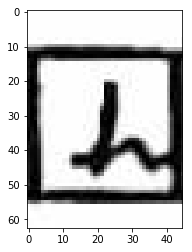

ORIGINAL: h h
enter: h
0.674825174825


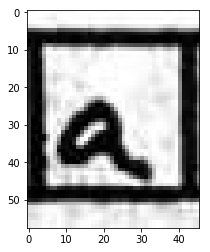

ORIGINAL: a a
enter: a
0.675958188153


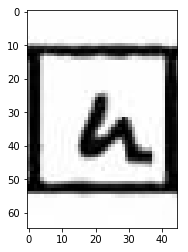

ORIGINAL: u U
enter: u
0.677083333333


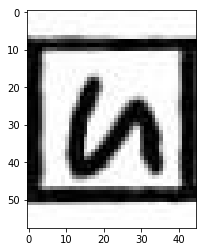

ORIGINAL: h U
enter: u
0.678200692042


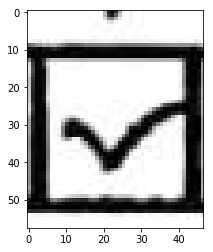

ORIGINAL: r V
enter: v
0.679310344828


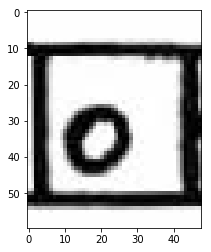

ORIGINAL: o b
enter: o
0.676975945017


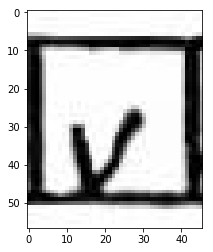

ORIGINAL: v V
enter: v
0.678082191781


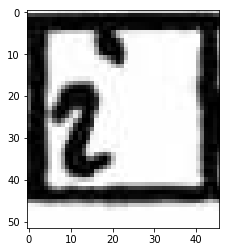

ORIGINAL: i E
enter: i
0.675767918089


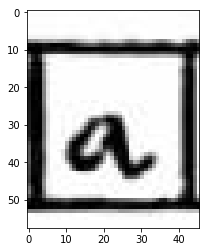

ORIGINAL: a a
enter: a
0.676870748299


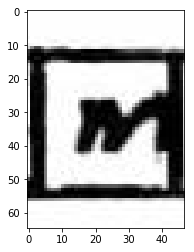

ORIGINAL: m M
enter: m
0.677966101695


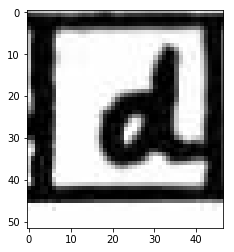

ORIGINAL: d d
enter: d
0.679054054054


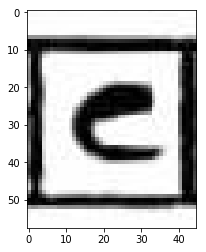

ORIGINAL: e e
enter: c
0.676767676768


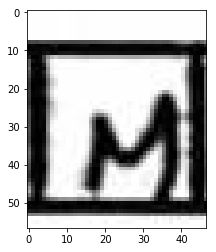

ORIGINAL: M M
enter: m
0.677852348993


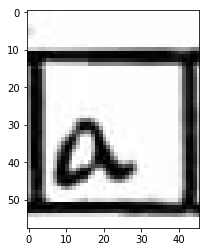

ORIGINAL: a h
enter: a
0.675585284281


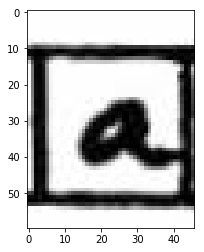

ORIGINAL: a a
enter: a
0.676666666667


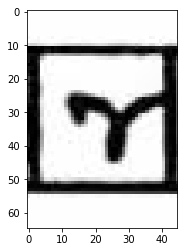

ORIGINAL: r n
enter: r
0.674418604651


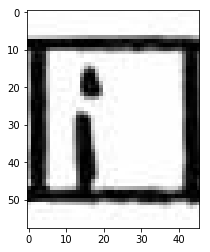

ORIGINAL: i I
enter: i
0.675496688742


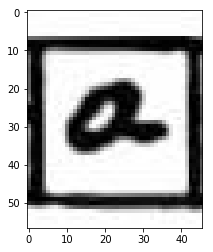

ORIGINAL: a a
enter: a
0.676567656766


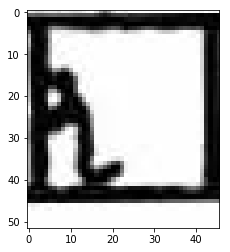

ORIGINAL: i r
enter: r
0.677631578947


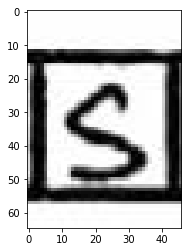

ORIGINAL: S S
enter: s
0.67868852459


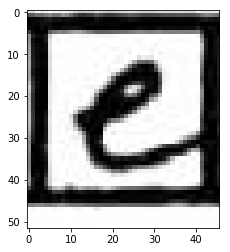

ORIGINAL: e e
enter: e
0.679738562092


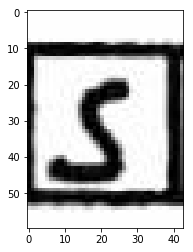

ORIGINAL: S S
enter: s
0.680781758958


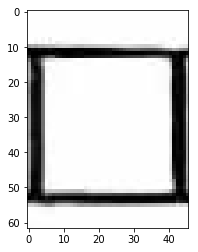

ORIGINAL: N I
enter: I
0.681818181818


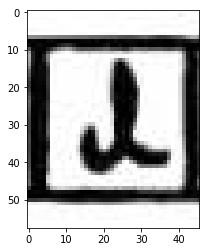

ORIGINAL: l d
enter: l
0.679611650485


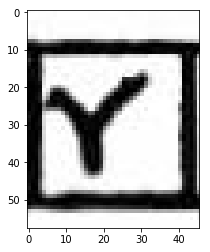

ORIGINAL: r r
enter: r
0.68064516129


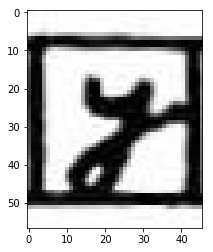

ORIGINAL: y Y
enter: y
0.681672025723


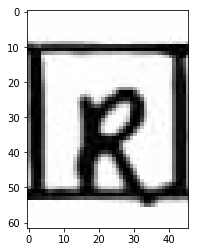

ORIGINAL: R R
enter: r
0.682692307692


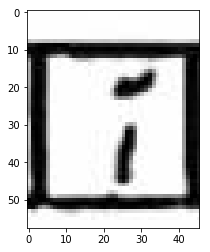

ORIGINAL: i I
enter: i
0.683706070288


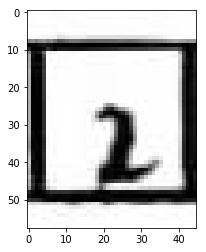

ORIGINAL: x Z
enter: z
0.684713375796


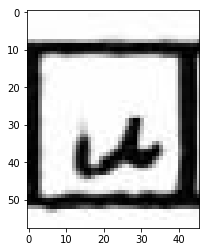

ORIGINAL: u U
enter: u
0.685714285714


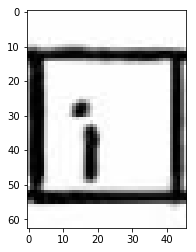

ORIGINAL: i I
enter: i
0.686708860759


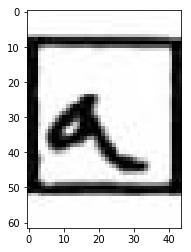

ORIGINAL: a a
enter: a
0.687697160883


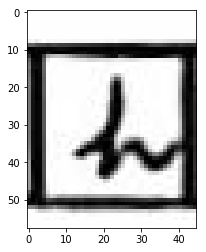

ORIGINAL: h h
enter: h
0.688679245283


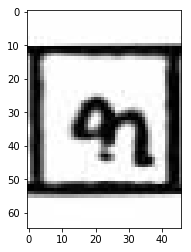

ORIGINAL: r M
enter: r
0.686520376176


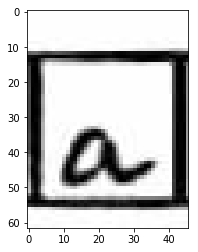

ORIGINAL: d a
enter: a
0.6875


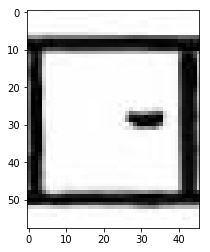

ORIGINAL: - F
enter: F
0.688473520249


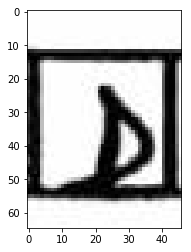

ORIGINAL: D D
enter: d
0.689440993789


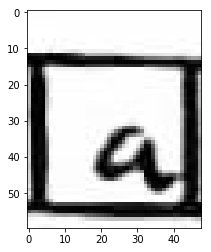

ORIGINAL: a a
enter: a
0.69040247678


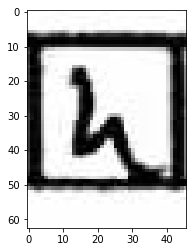

ORIGINAL: h K
enter: h
0.688271604938


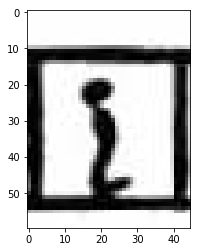

ORIGINAL: i I
enter: i
0.689230769231


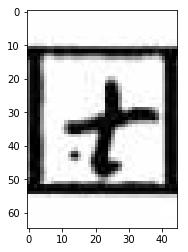

ORIGINAL: t t
enter: t
0.69018404908


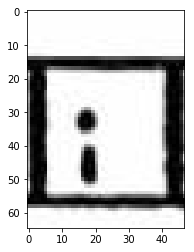

ORIGINAL: i I
enter: i
0.691131498471


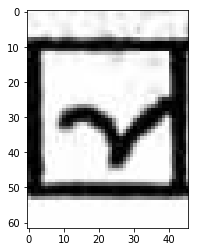

ORIGINAL: r V
enter: r
0.689024390244


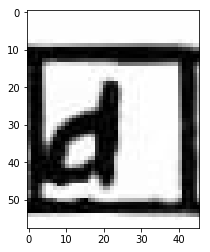

ORIGINAL: d H
enter: d
0.686930091185


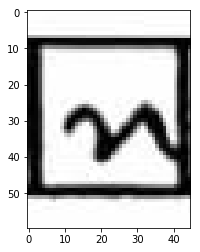

ORIGINAL: n V
enter: n
0.684848484848


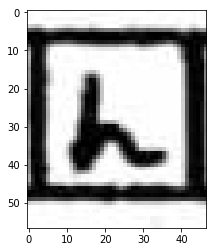

ORIGINAL: h h
enter: h
0.68580060423


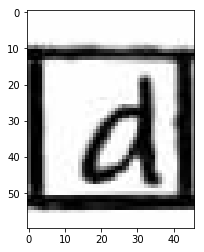

ORIGINAL: d d
enter: d
0.686746987952


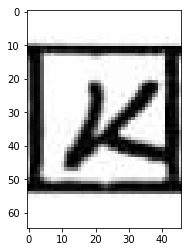

ORIGINAL: k K
enter: k
0.687687687688


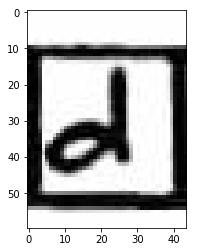

ORIGINAL: d d
enter: d
0.688622754491


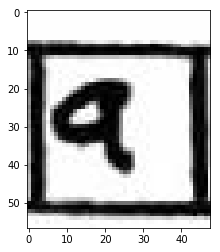

ORIGINAL: a A
enter: a
0.689552238806


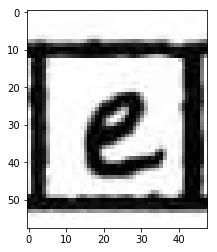

ORIGINAL: e e
enter: e
0.690476190476


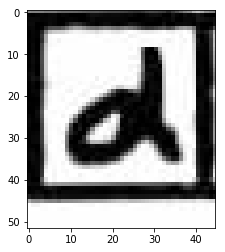

ORIGINAL: d d
enter: d
0.691394658754


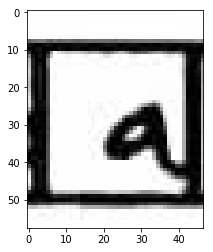

ORIGINAL: a a
enter: a
0.692307692308


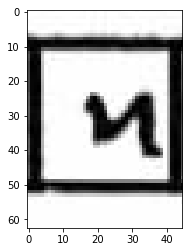

ORIGINAL: n n
enter: n
0.693215339233


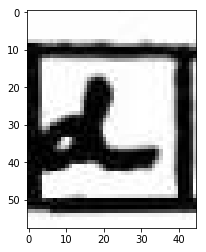

ORIGINAL: d K
enter: d
0.691176470588


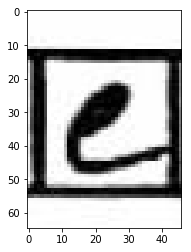

ORIGINAL: e e
enter: e
0.692082111437


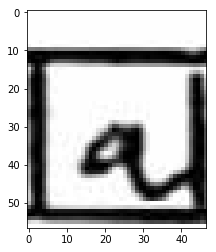

ORIGINAL: a a
enter: a
0.69298245614


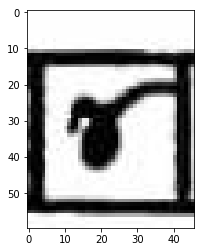

ORIGINAL: r Y
enter: r
0.690962099125


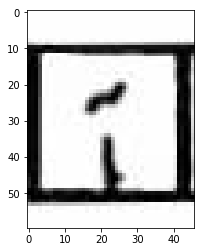

ORIGINAL: i I
enter: i
0.691860465116


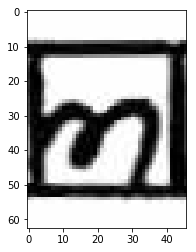

ORIGINAL: n n
enter: n
0.692753623188


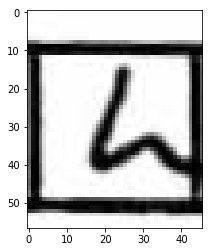

ORIGINAL: h L
enter: h
0.690751445087


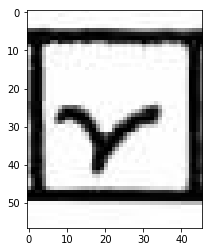

ORIGINAL: r r
enter: r
0.691642651297


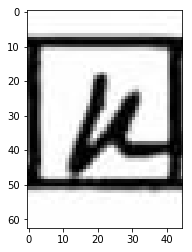

ORIGINAL: k U
enter: u
0.692528735632


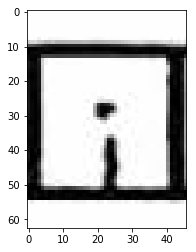

ORIGINAL: i I
enter: i
0.69340974212


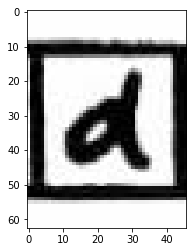

ORIGINAL: d d
enter: d
0.694285714286


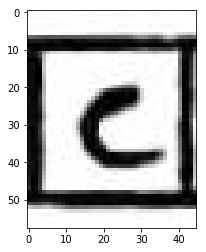

ORIGINAL: c C
enter: c
0.695156695157


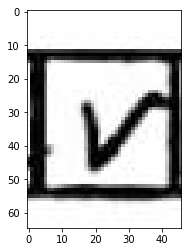

ORIGINAL: v V
enter: v
0.696022727273


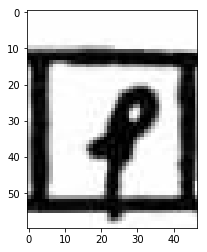

ORIGINAL: P P
enter: p
0.696883852691


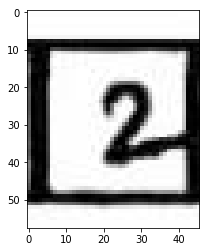

ORIGINAL: z Z
enter: z
0.697740112994


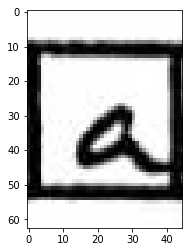

ORIGINAL: a a
enter: a
0.698591549296


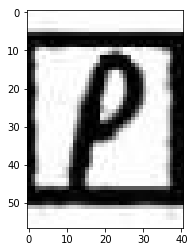

ORIGINAL: P P
enter: p
0.699438202247


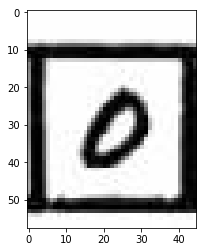

ORIGINAL: o O
enter: o
0.700280112045


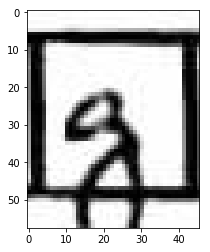

ORIGINAL: g g
enter: g
0.701117318436


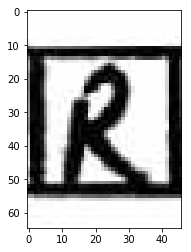

ORIGINAL: R R
enter: r
0.701949860724


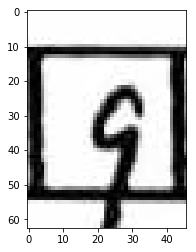

ORIGINAL: g G
enter: g
0.702777777778


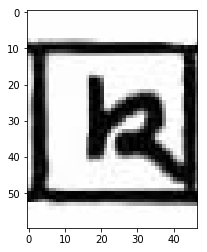

ORIGINAL: k R
enter: r
0.703601108033


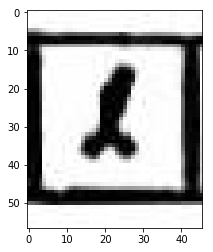

ORIGINAL: l Z
enter: l
0.701657458564


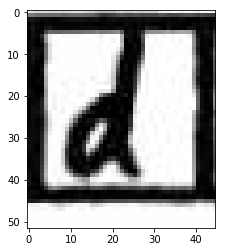

ORIGINAL: d d
enter: d
0.702479338843


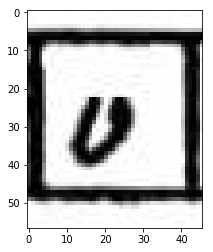

ORIGINAL: o U
enter: u
0.703296703297


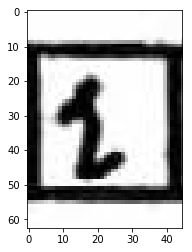

ORIGINAL: i Z
enter: i
0.701369863014


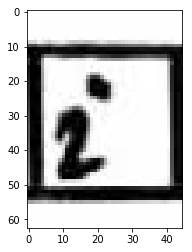

ORIGINAL: i E
enter: i
0.699453551913


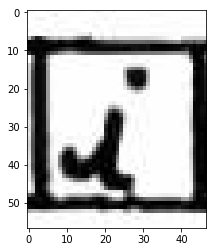

ORIGINAL: i h
enter: i
0.697547683924


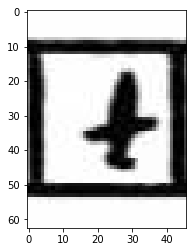

ORIGINAL: t f
enter: t
0.695652173913


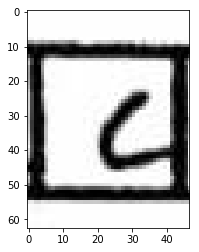

ORIGINAL: c C
enter: c
0.69647696477


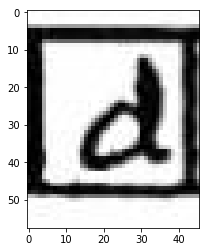

ORIGINAL: d d
enter: d
0.697297297297


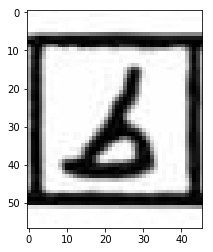

ORIGINAL: b b
enter: b
0.698113207547


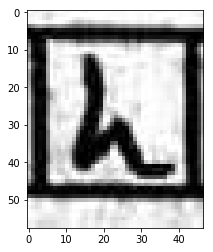

ORIGINAL: h h
enter: h
0.698924731183


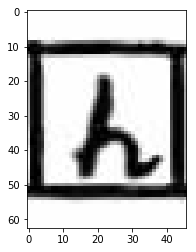

ORIGINAL: h h
enter: h
0.699731903485


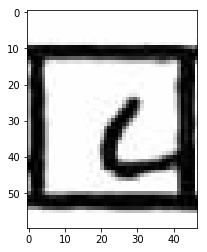

ORIGINAL: c C
enter: c
0.700534759358


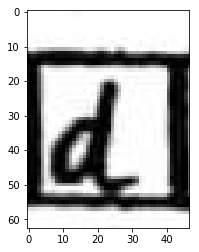

ORIGINAL: d d
enter: d
0.701333333333


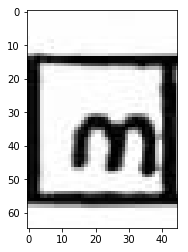

ORIGINAL: m M
enter: m
0.702127659574


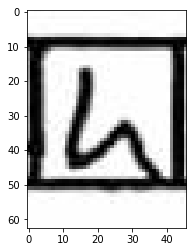

ORIGINAL: u U
enter: h
0.700265251989


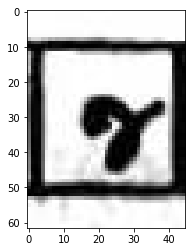

ORIGINAL: r n
enter: r
0.698412698413


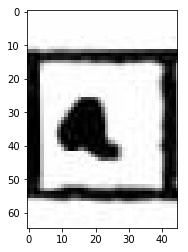

ORIGINAL: a a
enter: a
0.699208443272


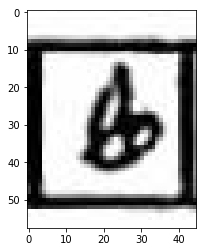

ORIGINAL: b B
enter: b
0.7


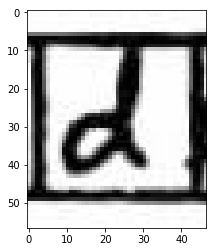

ORIGINAL: d d
enter: d
0.700787401575


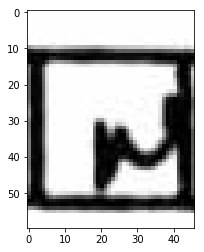

ORIGINAL: N N
enter: n
0.701570680628


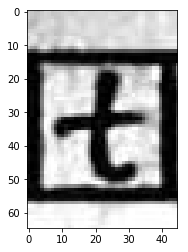

ORIGINAL: t t
enter: t
0.702349869452


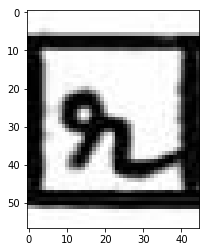

ORIGINAL: r q
enter: r
0.700520833333


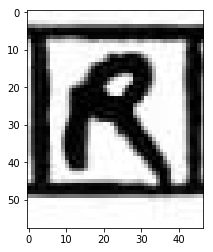

ORIGINAL: r R
enter: r
0.701298701299


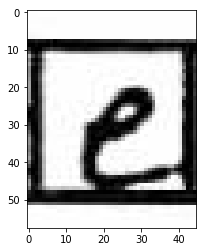

ORIGINAL: e e
enter: e
0.70207253886


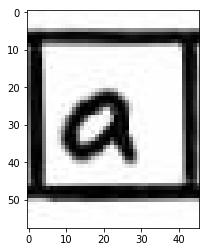

ORIGINAL: a a
enter: a
0.702842377261


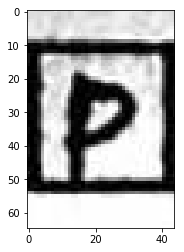

ORIGINAL: p P
enter: p
0.703608247423


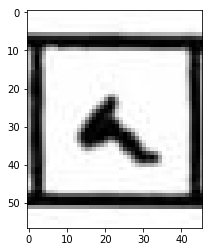

ORIGINAL: a I
enter: a
0.701799485861


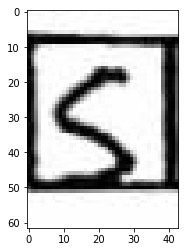

ORIGINAL: S S
enter: s
0.702564102564


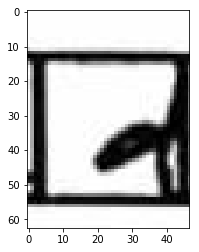

ORIGINAL: d a
enter: d
0.700767263427


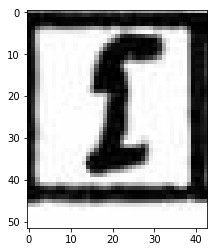

ORIGINAL: I I
enter: i
0.701530612245


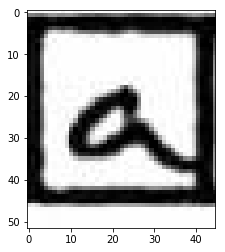

ORIGINAL: a a
enter: a
0.702290076336


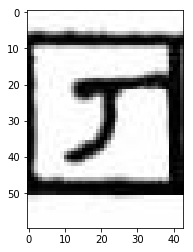

ORIGINAL: J J
enter: j
0.703045685279


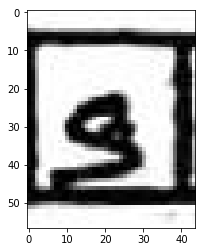

ORIGINAL: s g
enter: s
0.701265822785


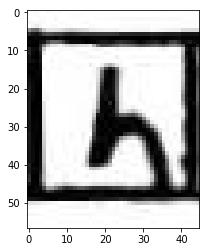

ORIGINAL: h h
enter: h
0.70202020202


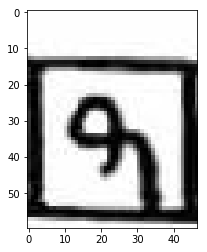

ORIGINAL: r g
enter: r
0.700251889169


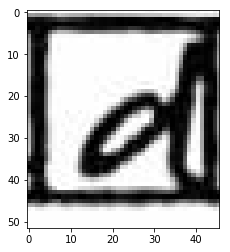

ORIGINAL: d d
enter: d
0.701005025126


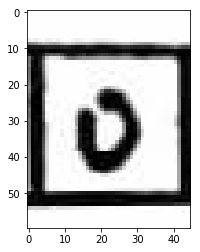

ORIGINAL: o U
enter: u
0.701754385965


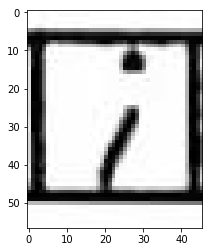

ORIGINAL: i I
enter: i
0.7025


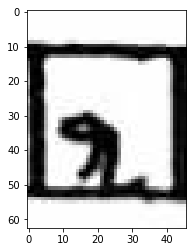

ORIGINAL: r h
enter: r
0.700748129676


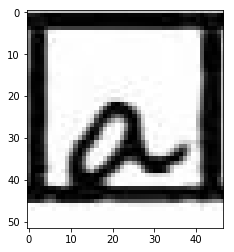

ORIGINAL: a a
enter: a
0.701492537313


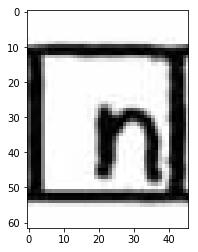

ORIGINAL: n n
enter: n
0.70223325062


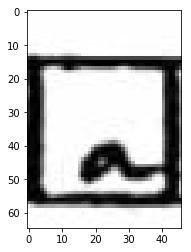

ORIGINAL: a a
enter: a
0.70297029703


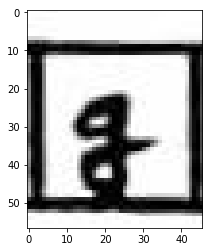

ORIGINAL: g g
enter: g
0.703703703704


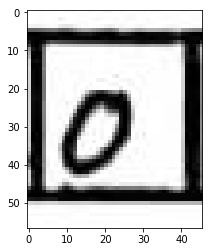

ORIGINAL: o D
enter: o
0.70197044335


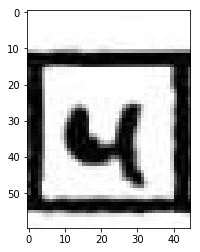

ORIGINAL: u U
enter: u
0.702702702703


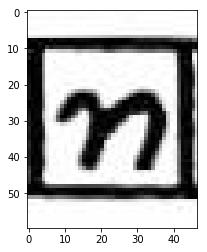

ORIGINAL: n n
enter: n
0.703431372549


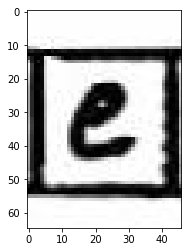

ORIGINAL: e e
enter: e
0.704156479218


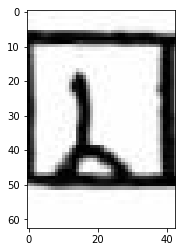

ORIGINAL: L L
enter: h
0.70243902439


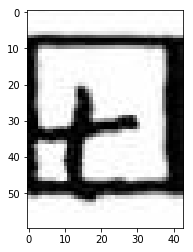

ORIGINAL: t t
enter: t
0.703163017032


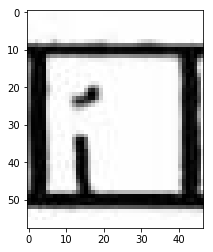

ORIGINAL: i f
enter: i
0.70145631068


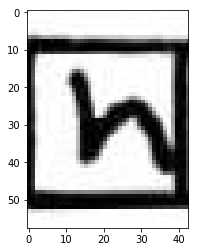

ORIGINAL: h n
enter: n
0.702179176755


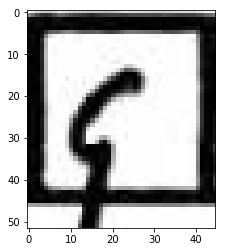

ORIGINAL: g G
enter: g
0.702898550725


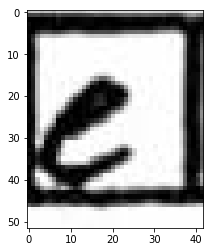

ORIGINAL: e e
enter: e
0.703614457831


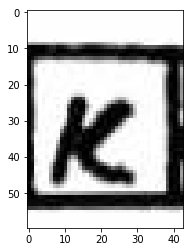

ORIGINAL: K K
enter: k
0.704326923077


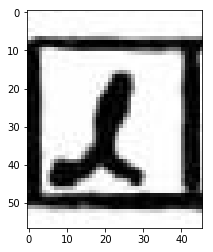

ORIGINAL: l L
enter: l
0.705035971223


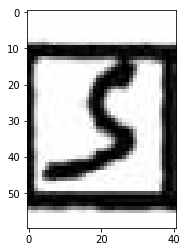

ORIGINAL: S S
enter: s
0.705741626794


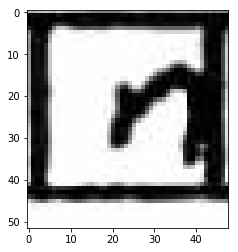

ORIGINAL: n r
enter: n
0.704057279236


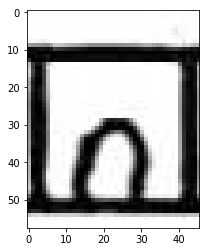

ORIGINAL: n n
enter: n
0.704761904762


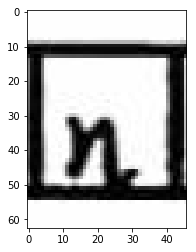

ORIGINAL: n n
enter: n
0.705463182898


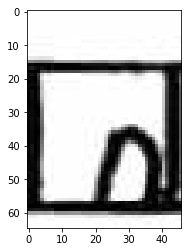

ORIGINAL: n n
enter: n
0.706161137441


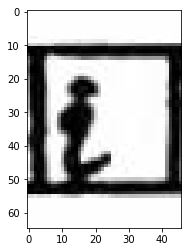

ORIGINAL: i E
enter: i
0.704491725768


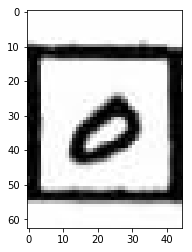

ORIGINAL: o O
enter: o
0.705188679245


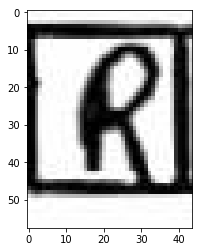

ORIGINAL: R R
enter: r
0.705882352941


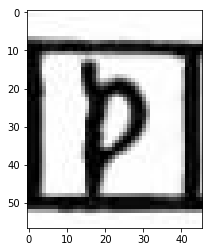

ORIGINAL: p P
enter: p
0.706572769953


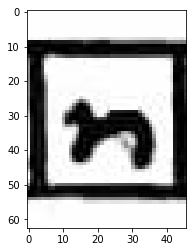

ORIGINAL: n n
enter: n
0.707259953162


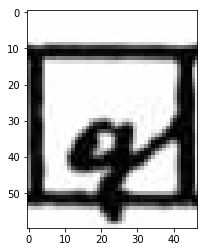

ORIGINAL: g Q
enter: g
0.705607476636


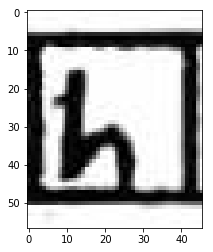

ORIGINAL: h h
enter: h
0.706293706294


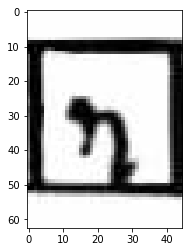

ORIGINAL: r n
enter: n
0.706976744186


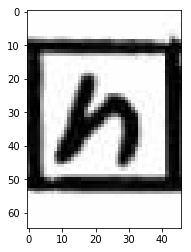

ORIGINAL: h h
enter: n
0.705336426914


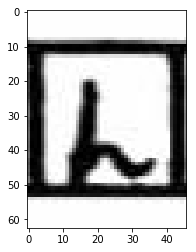

ORIGINAL: h h
enter: h
0.706018518519


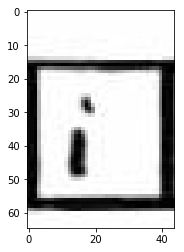

ORIGINAL: i I
enter: i
0.706697459584


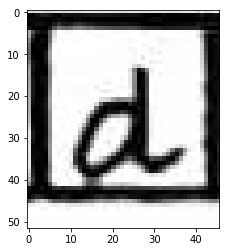

ORIGINAL: d d
enter: d
0.707373271889


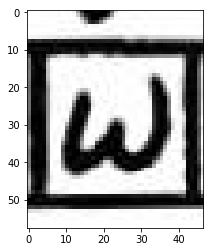

ORIGINAL: w W
enter: w
0.708045977011


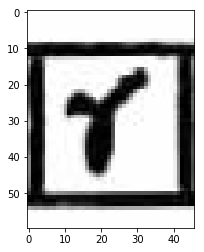

ORIGINAL: r r
enter: r
0.70871559633


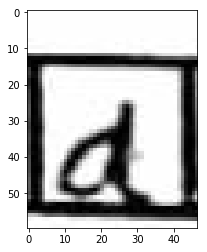

ORIGINAL: d d
enter: d
0.70938215103


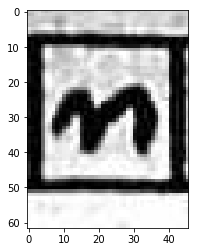

ORIGINAL: n M
enter: n
0.707762557078


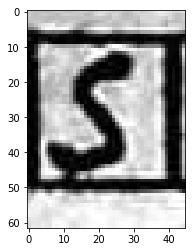

ORIGINAL: S S
enter: s
0.708428246014


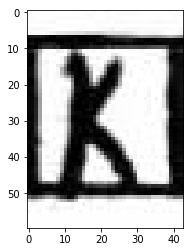

ORIGINAL: K K
enter: k
0.709090909091


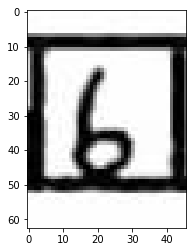

ORIGINAL: b b
enter: b
0.709750566893


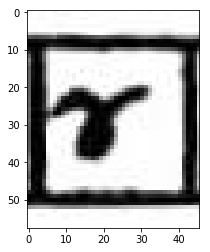

ORIGINAL: r H
enter: r
0.70814479638


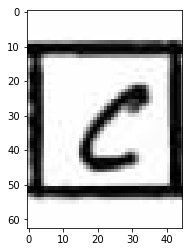

ORIGINAL: C C
enter: c
0.708803611738


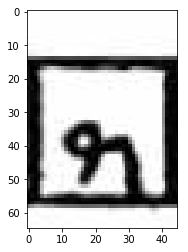

ORIGINAL: r g
enter: r
0.707207207207


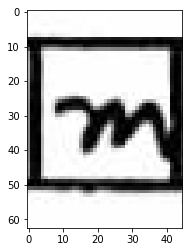

ORIGINAL: m M
enter: m
0.707865168539


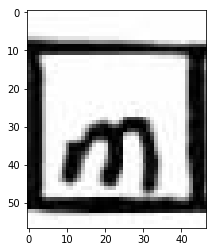

ORIGINAL: m M
enter: m
0.708520179372


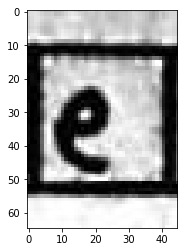

ORIGINAL: e e
enter: e
0.709172259508


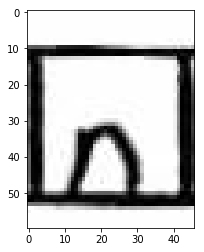

ORIGINAL: n n
enter: n
0.709821428571


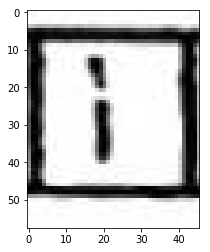

ORIGINAL: i I
enter: i
0.710467706013


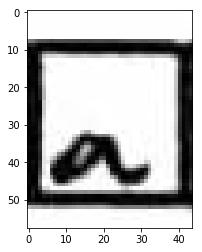

ORIGINAL: a a
enter: a
0.711111111111


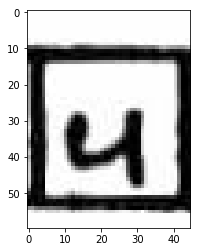

ORIGINAL: u U
enter: u
0.711751662971


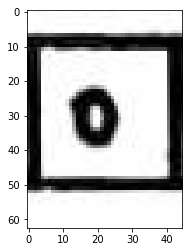

ORIGINAL: o O
enter: o
0.712389380531


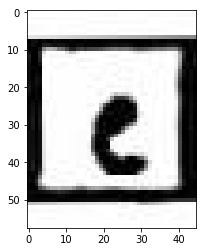

ORIGINAL: e C
enter: e
0.710816777042


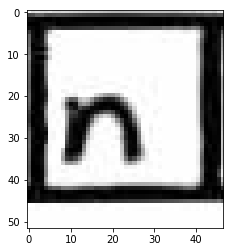

ORIGINAL: n h
enter: n
0.709251101322


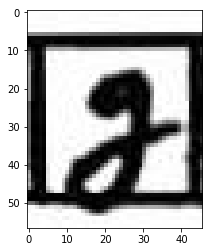

ORIGINAL: g a
enter: g
0.707692307692


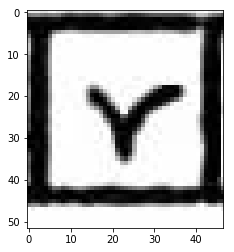

ORIGINAL: r r
enter: r
0.708333333333


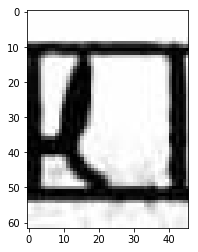

ORIGINAL: l d
enter: l
0.706783369803


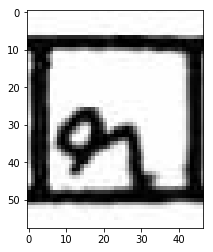

ORIGINAL: r M
enter: r
0.705240174672


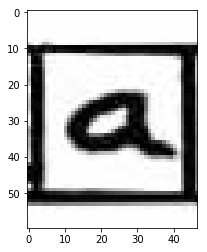

ORIGINAL: a a
enter: a
0.705882352941


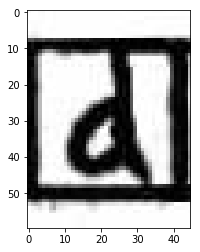

ORIGINAL: d d
enter: d
0.70652173913


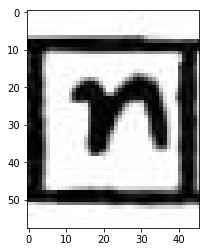

ORIGINAL: n n
enter: n
0.70715835141


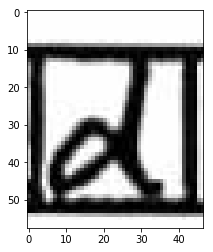

ORIGINAL: d d
enter: d
0.707792207792


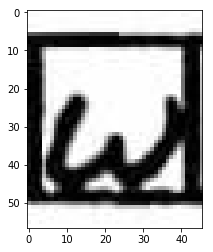

ORIGINAL: w U
enter: w
0.70626349892


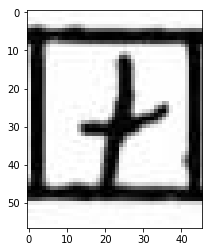

ORIGINAL: t t
enter: t
0.706896551724


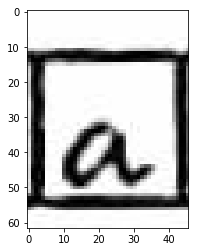

ORIGINAL: b a
enter: a
0.70752688172


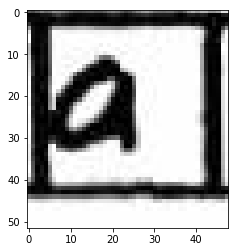

ORIGINAL: a A
enter: a
0.708154506438


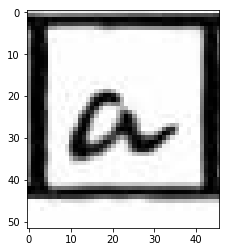

ORIGINAL: a a
enter: a
0.708779443255


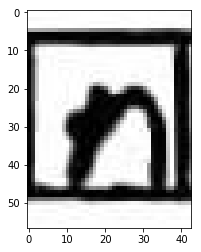

ORIGINAL: n n
enter: n
0.709401709402


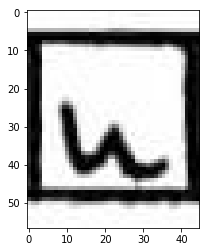

ORIGINAL: u U
enter: u
0.710021321962


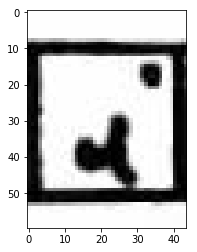

ORIGINAL: i I
enter: i
0.710638297872


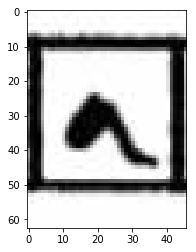

ORIGINAL: a a
enter: a
0.711252653928


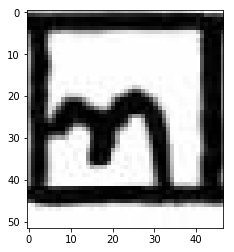

ORIGINAL: n n
enter: n
0.71186440678


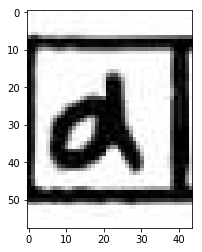

ORIGINAL: d d
enter: d
0.712473572939


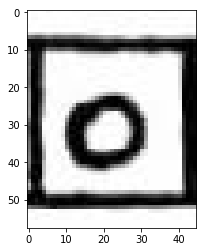

ORIGINAL: o O
enter: o
0.713080168776


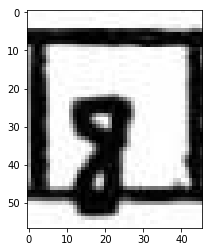

ORIGINAL: g g
enter: g
0.713684210526


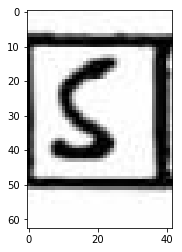

ORIGINAL: S S
enter: s
0.714285714286


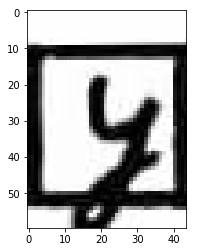

ORIGINAL: y Y
enter: y
0.714884696017


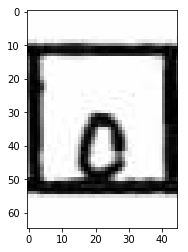

ORIGINAL: o O
enter: o
0.715481171548


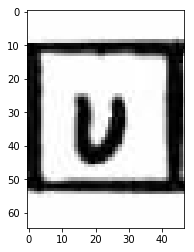

ORIGINAL: u U
enter: u
0.716075156576


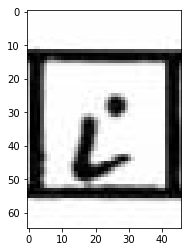

ORIGINAL: i E
enter: i
0.714583333333


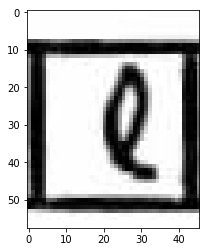

ORIGINAL: l e
enter: l
0.713097713098


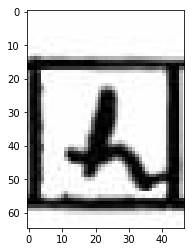

ORIGINAL: h K
enter: h
0.711618257261


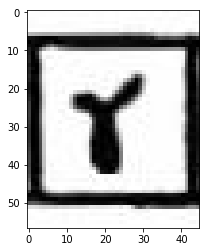

ORIGINAL: r n
enter: r
0.710144927536


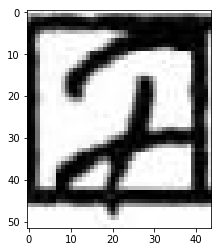

ORIGINAL: I F
enter: i
0.70867768595


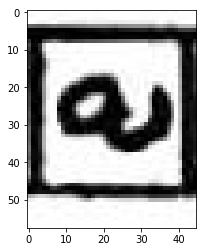

ORIGINAL: a Q
enter: a
0.707216494845


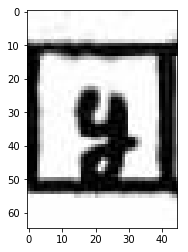

ORIGINAL: y Y
enter: y
0.707818930041


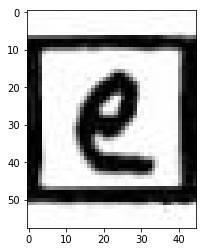

ORIGINAL: e e
enter: e
0.70841889117


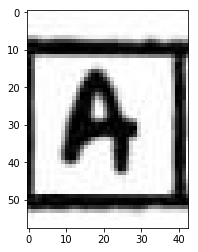

ORIGINAL: A A
enter: a
0.709016393443


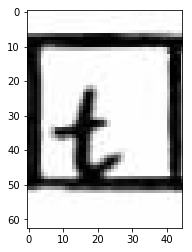

ORIGINAL: t t
enter: t
0.709611451943


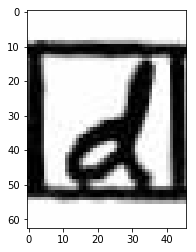

ORIGINAL: d d
enter: d
0.710204081633


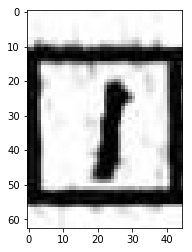

ORIGINAL: i I
enter: l
0.708757637475


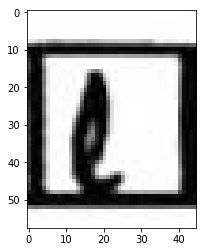

ORIGINAL: l C
enter: l
0.707317073171


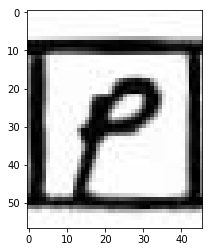

ORIGINAL: p P
enter: p
0.707910750507


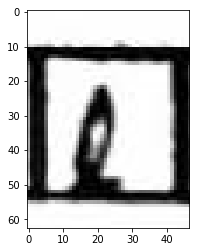

ORIGINAL: l h
enter: l
0.706477732794


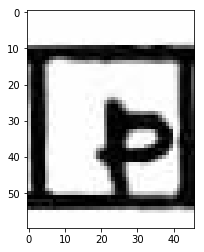

ORIGINAL: p f
enter: p
0.705050505051


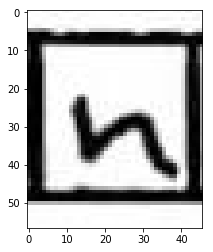

ORIGINAL: n h
enter: n
0.703629032258


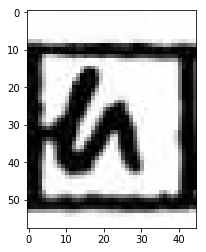

ORIGINAL: h h
enter: h
0.704225352113


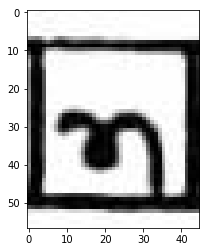

ORIGINAL: n n
enter: n
0.704819277108


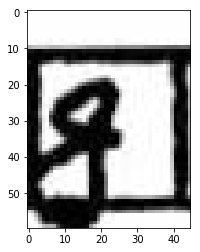

ORIGINAL: g g
enter: g
0.705410821643


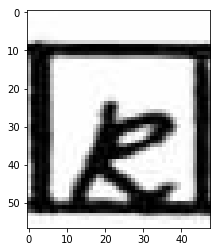

ORIGINAL: k K
enter: k
0.706


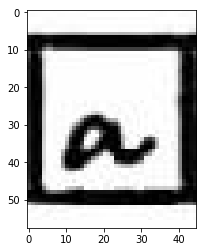

ORIGINAL: a a
enter: a
0.706586826347


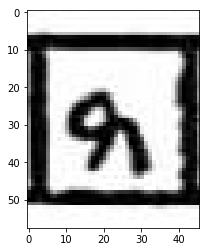

ORIGINAL: r A
enter: r
0.705179282869


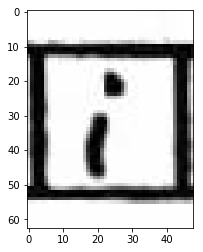

ORIGINAL: i I
enter: i
0.705765407555


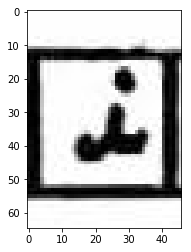

ORIGINAL: i I
enter: i
0.706349206349


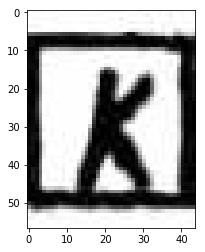

ORIGINAL: K K
enter: k
0.706930693069


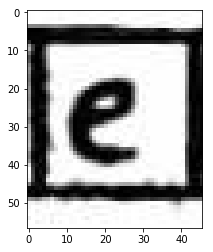

ORIGINAL: e e
enter: e
0.707509881423


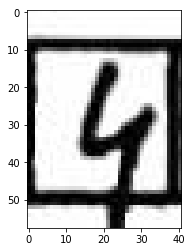

ORIGINAL: G t
enter: g
0.706114398422


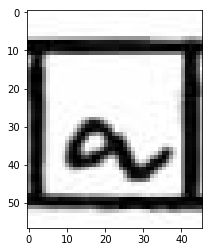

ORIGINAL: a a
enter: a
0.706692913386


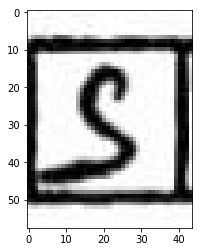

ORIGINAL: S S
enter: s
0.707269155206


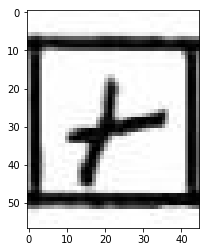

ORIGINAL: t t
enter: t
0.707843137255


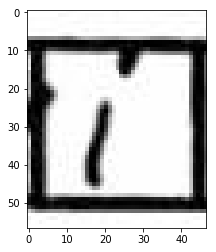

ORIGINAL: V L
enter: i
0.706457925636


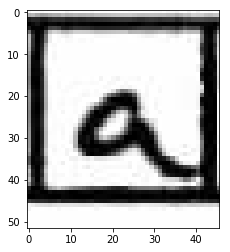

ORIGINAL: a a
enter: s
0.705078125


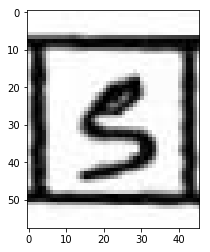

ORIGINAL: S S
enter: s
0.705653021442


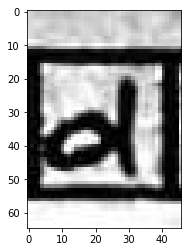

ORIGINAL: d d
enter: d
0.706225680934


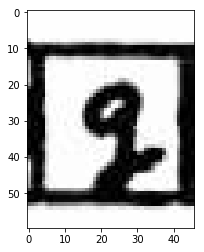

ORIGINAL: g g
enter: g
0.706796116505


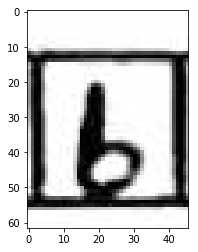

ORIGINAL: a b
enter: b
0.707364341085


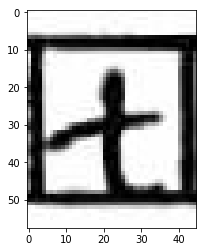

ORIGINAL: t t
enter: t
0.707930367505


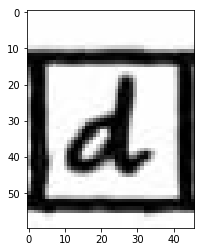

ORIGINAL: d d
enter: d
0.708494208494


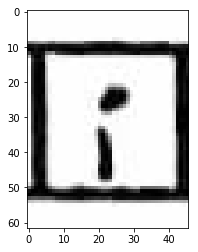

ORIGINAL: i J
enter: i
0.707129094412


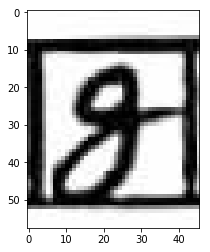

ORIGINAL: g g
enter: g
0.707692307692


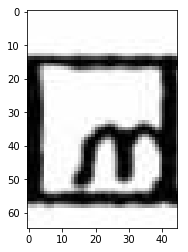

ORIGINAL: m n
enter: m
0.706333973129


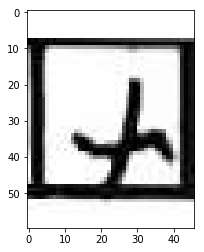

ORIGINAL: t f
enter: f
0.706896551724


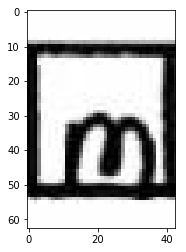

ORIGINAL: m M
enter: m
0.707456978967


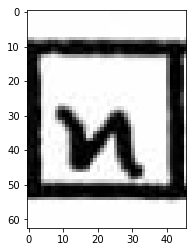

ORIGINAL: n n
enter: n
0.708015267176


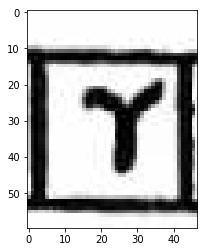

ORIGINAL: r r
enter: r
0.708571428571


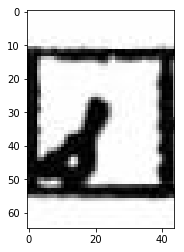

ORIGINAL: s d
enter: s
0.707224334601


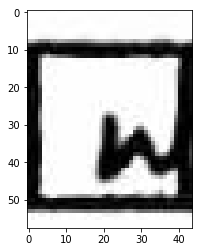

ORIGINAL: w W
enter: n
0.705882352941


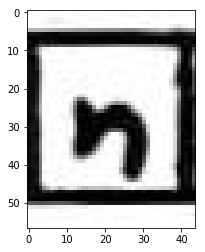

ORIGINAL: n n
enter: n
0.706439393939


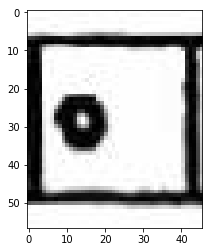

ORIGINAL: o b
enter: o
0.705103969754


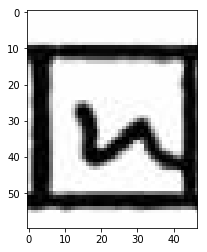

ORIGINAL: n Y
enter: n
0.703773584906


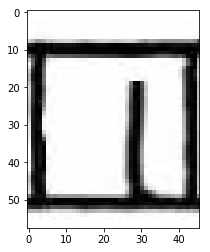

ORIGINAL: l I
enter: l
0.702448210923


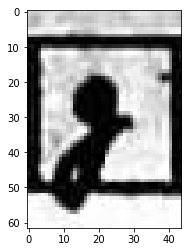

ORIGINAL: g g
enter: g
0.703007518797


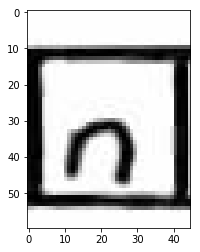

ORIGINAL: n n
enter: n
0.703564727955


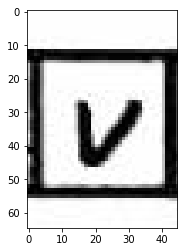

ORIGINAL: v V
enter: v
0.704119850187


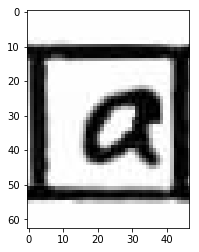

ORIGINAL: a a
enter: a
0.704672897196


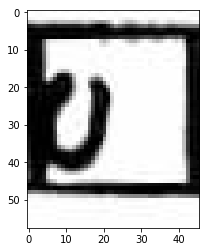

ORIGINAL: u V
enter: u
0.703358208955


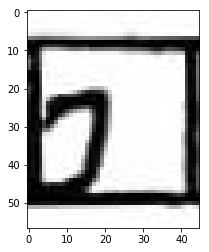

ORIGINAL: j D
enter: j
0.702048417132


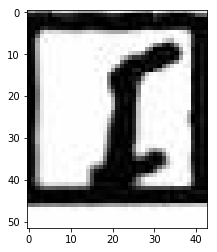

ORIGINAL: I I
enter: i
0.702602230483


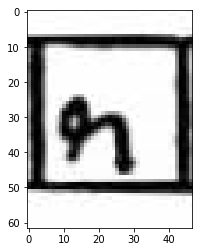

ORIGINAL: r h
enter: r
0.701298701299


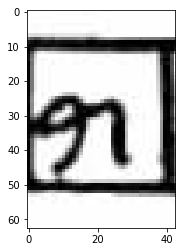

ORIGINAL: r q
enter: r
0.7


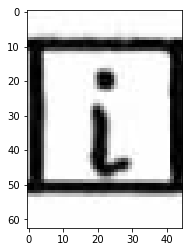

ORIGINAL: i I
enter: i
0.700554528651


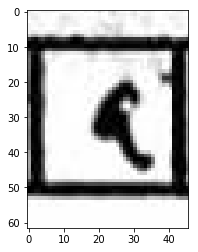

ORIGINAL: a C
enter: a
0.69926199262


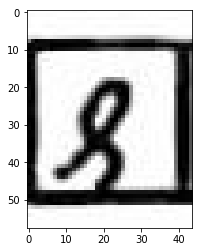

ORIGINAL: S q
enter: s
0.697974217311


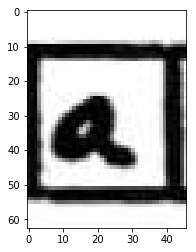

ORIGINAL: a a
enter: a
0.698529411765


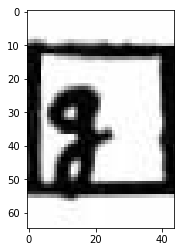

ORIGINAL: g G
enter: gg
0.697247706422


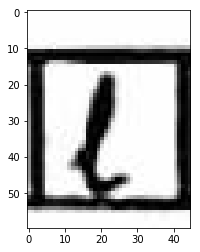

ORIGINAL: l L
enter: l
0.697802197802


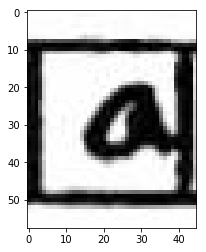

ORIGINAL: a a
enter: a
0.698354661792


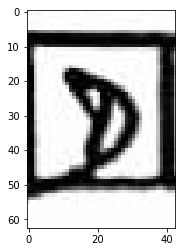

ORIGINAL: D D
enter: d
0.698905109489


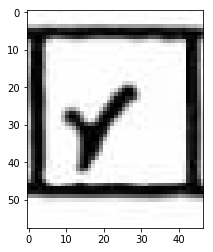

ORIGINAL: r V
enter: v
0.699453551913


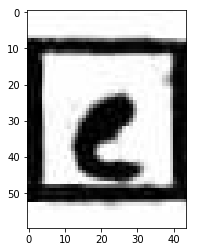

ORIGINAL: e e
enter: e
0.7


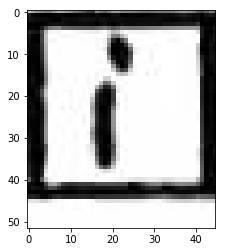

ORIGINAL: i I
enter: i
0.70054446461


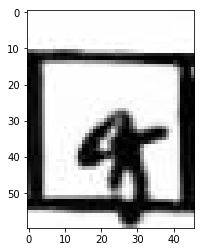

ORIGINAL: g g
enter: g
0.701086956522


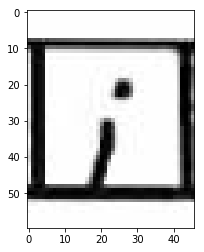

ORIGINAL: i I
enter: i
0.701627486438


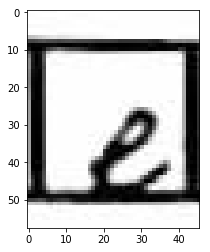

ORIGINAL: e e
enter: e
0.702166064982


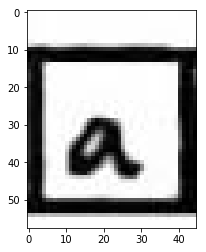

ORIGINAL: a a
enter: a
0.702702702703


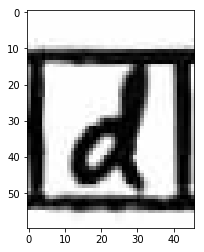

ORIGINAL: d d
enter: d
0.703237410072


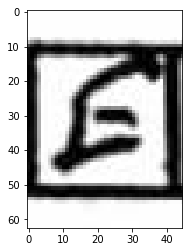

ORIGINAL: E E
enter: e
0.703770197487


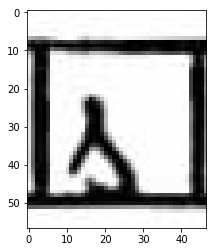

ORIGINAL: s d
enter: s
0.702508960573


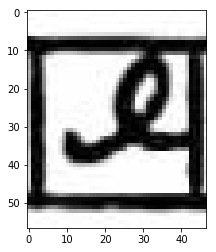

ORIGINAL: l Q
enter: l
0.701252236136


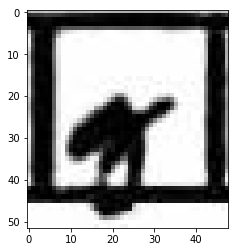

ORIGINAL: g M
enter: g
0.7


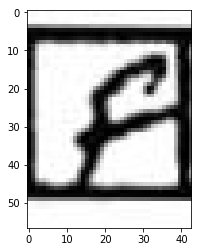

ORIGINAL: F f
enter: f
0.700534759358


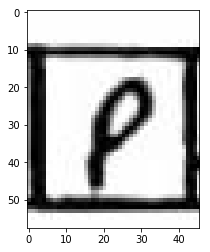

ORIGINAL: P P
enter: p
0.701067615658


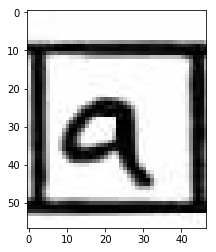

ORIGINAL: a a
enter: a
0.701598579041


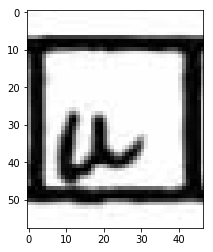

ORIGINAL: u W
enter: u
0.700354609929


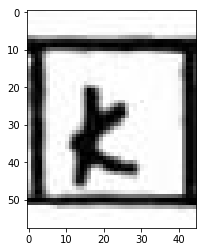

ORIGINAL: k K
enter: k
0.700884955752


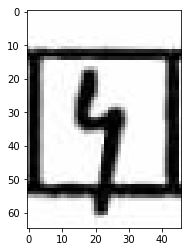

ORIGINAL: y f
enter: y
0.69964664311


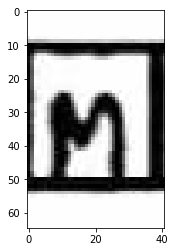

ORIGINAL: M M
enter: m
0.700176366843


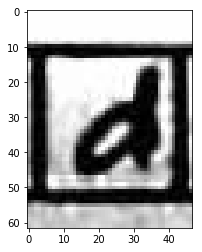

ORIGINAL: d d
enter: d
0.700704225352


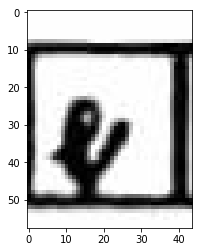

ORIGINAL: v q
enter: e
0.699472759227


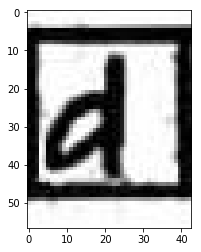

ORIGINAL: d d
enter: d
0.7


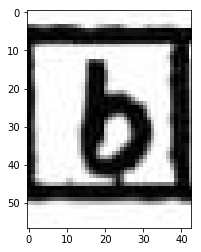

ORIGINAL: b b
enter: b
0.700525394046


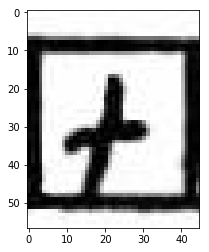

ORIGINAL: t t
enter: t
0.701048951049


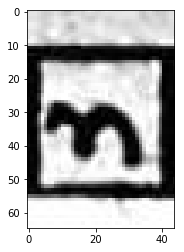

ORIGINAL: n n
enter: n
0.701570680628


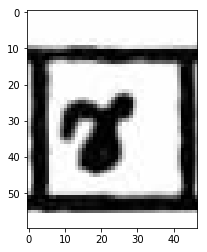

ORIGINAL: r B
enter: r
0.700348432056


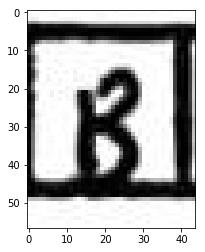

ORIGINAL: B B
enter: b
0.700869565217


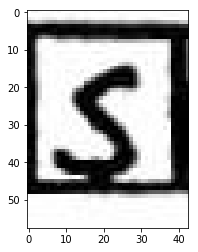

ORIGINAL: S S
enter: s
0.701388888889


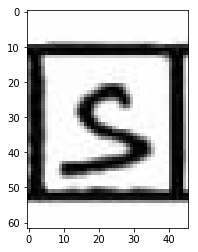

ORIGINAL: S S
enter: s
0.701906412478


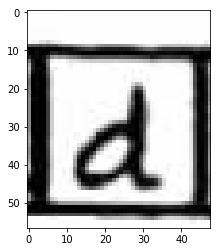

ORIGINAL: d d
enter: d
0.702422145329


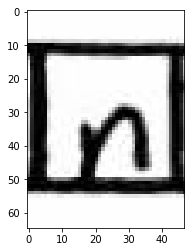

ORIGINAL: n n
enter: n
0.702936096718


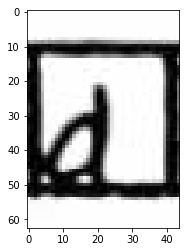

ORIGINAL: d H
enter: d
0.701724137931


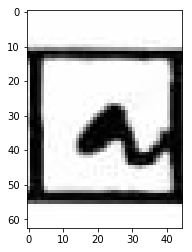

ORIGINAL: a a
enter: a
0.702237521515


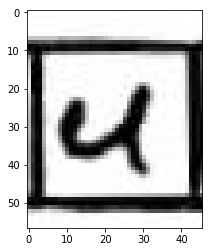

ORIGINAL: u K
enter: u
0.701030927835


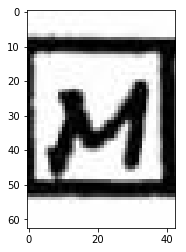

ORIGINAL: M M


KeyboardInterrupt: 

In [5]:
WRONG_ANNOTAIONS = []
# img_list = sorted(img_list,key=lambda x:int(str.split(x,'.jpg')[0]))
right = 0
total = 0.0
for j,i in enumerate(img_list):
    converter = utils.strLabelConverter(alphabet)
# 	print converter

    if str.split(str.split(i,'$')[1],'.jpg')[0]!=' ':
        transformer = dataset.resizeNormalize((32, 32))
        image = Image.open(img_path+i).convert('L')
        image = transformer(image)
    #     print image
        plt.imshow(cv2.imread(img_path+i))
        plt.show()
        if torch.cuda.is_available():
                image = image.cuda()
        image = image.view(1, *image.size())
        image = Variable(image)


        model.eval()
        preds = model(image)
        #print preds
        _, preds = preds.max(2)
        preds = preds.transpose(1, 0).contiguous().view(-1)

        preds_size = Variable(torch.IntTensor([preds.size(0)]))
        raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
        sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
#         print('%-20s => %-20s' % (raw_pred, sim_pred))
#         label = label+sim_pred
        print 'ORIGINAL: '+str.split(str.split(i,'$')[1],'.jpg')[0],sim_pred
        inp =raw_input('enter: ')
        
        if sim_pred.upper()==inp.upper():#str.split(str.split(i,'$')[1],'.jpg')[0].upper():
            right=right+1
        total = total + 1
        print (right/total)
#         if str.split(str.split(i,'$')[1],'.jpg')[0].upper()!=inp:
#             WRONG_ANNOTAIONS.append(i)
print right/total,right,total
#         if j==100:
#             break
# print label.upper()

In [9]:
len(img_list)

684

# Loding different model outputs

In [21]:
outputs = {}
for iiu in range(0,2):
    model_path = 'data/models4/netCRNN_'+str(25)+'_1388.pth'
    img_path = '../../misc/Annotatedblobs/'
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
    img_list = os.listdir(img_path)
    model = crnn.CRNN(32, 1,len(alphabet)+1, 256)
    own = model.state_dict()
    #print own.keys()
    if torch.cuda.is_available():
        model = model.cuda()
    print('loading pretrained model from %s' % model_path)


    w = torch.load(model_path)

    #print w.keys()[0]
    w1={}

    for k,v in w.items():
        w1[str.split(k,'module.')[1]]=v


    model.load_state_dict(w1)


    # predictions
    label = ''
#     img_list = sorted(img_list,key=lambda x:int(str.split(x,'.jpg')[0]))
    wr=0
    right = 0
    total = 0.0
    for i in (img_list):
        converter = utils.strLabelConverter(alphabet)
    

        if str.split(str.split(i,'$')[1],'.jpg')[0]!=' ':
            transformer = dataset.resizeNormalize((32, 32))
            image = Image.open(img_path+i).convert('L')
            image = transformer(image)
    
    #         plt.imshow(cv2.imread(img_path+i))
    #         plt.show()
            if torch.cuda.is_available():
                    image = image.cuda()
            image = image.view(1, *image.size())
            image = Variable(image)


            model.eval()
            preds = model(image)
            #print preds
            _, preds = preds.max(2)
            preds = preds.transpose(1, 0).contiguous().view(-1)

            preds_size = Variable(torch.IntTensor([preds.size(0)]))
            raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
            sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
#             print('%-20s => %-20s' % (raw_pred, sim_pred))
#             label = label+sim_pred
            if sim_pred!='a':
                wr=wr+1
            if j==100:
                break
            if sim_pred.upper()==str.split(str.split(i,'$')[1],'.jpg')[0].upper():
                right = right + 1
            total = total + 1
#     upper = label.upper()
#     outputs[iiu]=upper
    
    print right/total,right,total


loading pretrained model from data/models4/netCRNN_25_1388.pth
0.658333333333 395 600.0
loading pretrained model from data/models4/netCRNN_25_1388.pth
0.658333333333 395 600.0


In [8]:
# Notice that pos is passed between calls and initially set to zero
def hamming(s1, s2, pos=0):    
    # Are we after the last character already?
    if pos < len(s1):
        # Return one if the current position differs and add the result for the following positions (starting at pos+1) to that
        return (s1[pos] != s2[pos]) + hamming(s1, s2, pos+1)
    else:
        # If the end is already reached, the remaining distance is 0
        return 0

In [91]:
s2 ='KARNATAKA'

In [92]:
len(s2)

9

In [93]:
for k,v in outputs.items():
    print hamming(v,s2)

IndexError: string index out of range